# Оценка рисков ДТП

##  Введение

Сервису каршеринга требуется система, оценивающая риск ДТП по выбранному маршруту.

**Цель:**

 - Разработать модель предсказания ДТП.
 
 - Проанализировать основные факторы ДТП.
 
 - Оценить возможность создания адекватной системы оценки водительского риска.

**Описание данных:**
   
   
   ***Названия таблиц:***
     
   *case_ids - индексы происшествий.*
     
   *collisions — общая информация о ДТП.*  
     
   *parties — информация об участниках ДТП.*
     
   *vehicles — информация о пострадавших машинах.*
             
   ***Целевая переменная:***
         
   *at_fault (виновник) в таблице parties.*
   
   
  

 ***Содержание таблиц***

*case_ids (индексы происшествий)*

- case_id (уникальный номер зарегистрированного происшествия в таблице происшествий) 
- db_year (год создания базы)


*parties (описание участников происшествия)*

- id (индекс текущей таблицы);
- case_id (уникальный номер зарегистрированного происшествия в таблице происшествий);
- party_number (номер участника происшествия) - от 1 до N: по числу участников происшествия;
- party_type (тип участника происшествия):
   - 1 - Car (Авто);
   - 2 - Road bumper (Дорожные знаки);
   - 3 - Building (Строения);
   - 4 - Road signs (Отбойник);
   - 5 - Other (Другое);
   - 6 - Operator (Оператор);
   - "" — Not Stated (Не указано).

- at_fault (виновность участника нет/да) - 0 или 1;
- insurance_premium (сумма страховки);
- party_drug_physical (состояние участника: физическое или с учетом принятых лекарств):
   - E - Under Drug Influence (Под воздействием лекарств);
   - F - Impairment Physical (Ухудшение состояния);
   - G - Impairment Unknown (Не известно);
   - H - Not Applicable (Не оценивался);
   - I - Sleepy / Fatigued (Сонный / усталый);
   - "" — Not Stated (Не указано).

- party_sobriety (трезвость участника):
   - A - Had Not Been Drinking (Не пил);
   - B - Had Been Drinking, Under Influence (Был пьян, под влиянием);
   - C - Had Been Drinking, Not Under Influence (Был пьян, не под влиянием);
   - D - Had Been Drinking, Impairment Unknown (Был пьян, ухудшение неизвестно);
   - G - Impairment Unknown (Неизвестно ухудшение);
   - H - Not Applicable (Не оценивался);
   - "" — Not Stated (Не указано).

- cellphone_in_use (наличие громкой телефонной связи в автомобиле нет/да) - 0 или 1 


*vehicles (описание автомобиля)*

- id (индекс текущей таблицы);
- case_id (идентификационный номер в базе данных);
- vehicle_type (тип кузова):
   - MINIVAN;
   - COUPE;
   - SEDAN;
   - HATCHBACK;
   - OTHER.
   
- vehicle_transmission (тип КПП):
   - auto (Автоматическая).
   - manual (Ручная).
   - "" — Not Stated (Не указано).
   
- vehicle_age (возраст автомобиля).


*collisions (информация о происшествия)*

- case_id (идентификационный номер в базе данных);
- collision_date (дата происшествия);
- collision_time (время происшествия);
- intersection (является ли место происшествия перекрестком):
   - Y — Intersection (перекрёсток);
   - N — Not Intersection (не перекрёсток);
   - "" — Not stated (Не указано).
   
- weather_1 (погода):
   - A — Clear (Ясно);
   - B — Cloudy (Облачно);
   - C — Raining (Дождь);
   - D — Snowing (Снегопад);
   - E — Fog (Туман);
   - F — Other (Другое);
   - G — Wind (Ветер);
   
- collision_damage (серьезность происшествия):
   - Fatal TC (Не подлежит восстановлению);
   - Severe Damage (Серьезное повреждение);
   - Middle Damage (Машина в целом на ходу);
   - Small Damage (Отдельный элемент под замену / покраску);
   - Scratch (Царапина).
   
- primary_collision_factor (основной фактор аварии):
   - A - Code Violation (Нарушение правил ПДД);
   - B - Other Improper Driving (Другое неправильное вождение);
   - C - Other Than Driver (Кроме водителя);
   - D - Unknown (Неизвестно);
   - E - Fell Asleep (Заснул);
   - "" — Not Stated (Не указано).
   
- road_surface (состояние дороги):
   - A — Dry (Сухая);
   - B — Wet (Мокрая);
   - C — Snowy or Icy (Заснеженная или обледенелая);
   - D — Slippery (Muddy, Oily, etc.) (Скользкая, грязная, маслянистая и т. д.);
   - "" — Not Stated (Не указано).
   
- lightning (освещение):
   - A — Daylight (Дневной свет);
   - B — Dusk-Dawn (Сумерки-Рассвет);
   - C — Dark-Street Lights (Темно-Уличные фонари);
   - D — Dark-No Street Lights (Темно-Нет уличных фонарей);
   - E — Dark-Street Lights Not Functioning (Темно-Уличные фонари не работают);
   - "" — Not Stated (Не указано).
   
- county_city_location (номер географических районов, где произошло ДТП);
- county_location (названия географических районов, где произошло ДТП);
- direction (направление движения):
   - N — North (Север)
   - E — East (Восток)
   - S — South (Юг)
   - W — West (Запад)
   - "" — Not State (Не указано)
   - на перекрёстке
   
- distance (расстояние до главной дороги в метрах);
- location_type (тип дороги):
   - H — Highway (Шоссе);
   - I — Intersection (Перекрёсток);
   - R — Ramp (or Collector) (Рампа);
   - "" — Not State Highway (Не указано).

- party_count (количество участников);
- pcf_violation_category (категория нарушения):
   - 01 - Driving or Bicycling Under the Influence of Alcohol or Drug - Вождение или езда на велосипеде в состоянии алкогольного или наркотического опьянения;
   - 02 - Impeding Traffic - Препятствие движению транспорта;
   - 03 - Unsafe Speed - Превышение скорости;
   - 04 - Following Too Closely - Опасное сближение;
   - 05 - Wrong Side of Road - Неправильная сторона дороги;
   - 06 — Improper Passing - Неправильное движение;
   - 07 — Unsafe Lane Change - Небезопасная смена полосы движения;
   - 08 — Improper Turning - Неправильный поворот;
   - 09 — Automobile Right of Way - Автомобильное право проезда;
   - 10 — Pedestrian Right of Way - Пешеходное право проезда;
   - 11 — Pedestrian Violation - Нарушение пешеходами;
   - 12 — Traffic Signals and Signs - Дорожные сигналы и знаки;
   - 13 — Hazardous Parking - Неправильная парковка;
   - 14 — Lights - Освещение;
   - 15 — Brakes - Тормоза;
   - 16 — Other Equipment - Другое оборудование;
   - 17 — Other Hazardous Violation - Другие нарушения;
   - 18 — Other Than Driver (or Pedestrian) - Кроме водителя или пешехода;
   - 19 — Speeding - Скорость;
   - 20 — Pedestrian dui - Нарушение пешехода;
   - 21 — Unsafe Starting or Backing - Опасный старт;
   - 22 — Other Improper Driving - Другое неправильное вождение;
   - 23 — Pedestrian or “Other” Under the Influence of Alcohol or Drug - Пешеход или «Другой» в состоянии алкогольного или наркотического опьянения;
   - 24 — Fell Asleep - Заснул;
   - 00 — Unknown - Неизвестно;
   - "" — Not Stated - Не указано.

- type_of_collision (тип аварии):
   - A — Head-On (Лоб в лоб);
   - B — Sideswipe (Сторона);
   - C — Rear End (Столкновение задней частью);
   - D — Broadside (Боковой удар);
   - E — Hit Object (Удар объекта);
   - F — Overturned (Опрокинутый);
   - G — Vehicle (транспортное средство/ Пешеход);
   - H — Other (Другое);
   - "" — Not Stated (Не указано).

- motor_vehicle_involved_with (дополнительные участники ДТП):
   - Other motor vehicle (Другой автомобиль);
   - Fixed object (Неподвижный объект);
   - Parked motor vehicle (Припаркованный автомобиль);
   - Pedestrian (Пешеход);
   - Bicycle (Велосипедист);
   - Non-collision (Не столкновение);
   - Other object (Другой объект);
   - Motor vehicle on other roadway (Автомобиль на другой проезжей);
   - Animal (Животное);
   - Train (Поезд).

- road_condition_1 (дорожное состояние):
   - A — Holes, Deep Ruts (Ямы, глубокая колея);
   - B — Loose Material on Roadway (Сыпучий материал на проезжей части);
   - C — Obstruction on Roadway (Препятствие на проезжей части);
   - D — Construction or Repair Zone (Зона строительства или ремонта);
   - E — Reduced Roadway Width (Уменьшенная ширина проезжей части);
   - F — Flooded (Затоплено);
   - G — Other (Другое);
   - H — No Unusual Condition (Нет ничего необычного);
   - "" — Not Stated (Не указано).

- control_device (устройство управления. Видимо, круиз-контроль):
   - A — Functioning (Функционирует);
   - B — Not Functioning (Не функционирует);
   - C — Obscured (Затемнённый);
   - D — None (Нет);
   - "" — Not Stated (Не указано).

**План выполнения проекта:**


   - Подключиться к базе и загрузить таблицы sql.
   
   
   - Провести первичное исследование таблиц.
   
   
   - Провести статистический анализ факторов ДТП.
   

   - Создать модель для оценки водительского риска.
   
   
   - Отобрать лучшую модель.
   
   
   - Проверить лучшую модель в работе. 
  
   
   - Написать промежуточные выводы и общий вывод по модели.

## Подключение к базе. Загрузка таблиц sql

In [1]:
#!pip install phik==0.10.0 -q

In [2]:
#!pip install --upgrade scikit-learn -q

In [3]:
# загружаем библиотеки
import torch
import torch.nn as nn

import pandas as pd
import numpy as np
from math import sqrt
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
import phik
import warnings

from sqlalchemy import create_engine, text as sql_text
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle 

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV


from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score

# настраиваем отображение 
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 250)
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

# задаем константы 
RAND_ST = 12345 
np.random.seed(RAND_ST)
torch.manual_seed(RAND_ST)
torch.use_deterministic_algorithms(True)

In [4]:
# подключаемся к базе данных:
# задаем конфигурацию базы данных
db_config = {
'user': 'praktikum_student', # имя пользователя,
'pwd': 'Sdf4$2;d-d30pp', # пароль,
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения,
'db': 'data-science-vehicle-db' # название базы данных,
} 

# формируем строку подключения
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db']
)

# создаем соединение с базой данных
connection = create_engine(connection_string)

### Вывод по первому  шагу

- Успешно загрузили библиотеки и подключились к базе. 

## Проведение первичного исследования таблиц

In [5]:
# создаем функцию обработки и загрузки таблиц
def get_query(query):
    query_df = pd.read_sql_query(con=connection, sql=sql_text(query))
    return query_df

In [6]:
# выгружаем таблицу 'case_ids'
case_ids_query = '''
SELECT *
FROM case_ids;
'''

display(get_query(case_ids_query))

,case_id,db_year
0,0081715,2021
1,0726202,2021
2,3858022,2021
3,3899441,2021
4,3899442,2021
...,...,...
1399995,5668365,2021
1399996,5668366,2021
1399997,5668367,2021
1399998,5668368,2021


In [7]:
# выгружаем таблицу 'parties'
parties_query = '''
SELECT *
FROM parties
WHERE party_type = 'car';
'''

display(get_query(parties_query))

,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,29,3899462,2,car,0,21.0,had not been drinking,None,0.0
1,142,3982898,2,car,0,71.0,had not been drinking,None,0.0
2,171,3982914,2,car,0,43.0,had not been drinking,None,1.0
3,290,3984348,2,car,0,NaN,impairment unknown,G,0.0
4,397,3987634,1,car,1,54.0,had not been drinking,None,0.0
...,...,...,...,...,...,...,...,...,...
2469309,2409805,5456653,2,car,0,35.0,not applicable,not applicable,0.0
2469310,2409806,5456654,1,car,0,19.0,had not been drinking,None,NaN
2469311,2409808,5456655,1,car,1,22.0,had not been drinking,None,1.0
2469312,2409809,5456655,2,car,0,44.0,had not been drinking,None,1.0


In [8]:
# выгружаем таблицу 'collisions'
collisions_query = '''
SELECT *
FROM collisions;
'''

display(get_query(collisions_query))

,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time
0,4083072,1942,los angeles,528.0,north,0.0,cloudy,highway,small damage,2,vehicle code violation,unsafe lane change,sideswipe,other motor vehicle,wet,normal,daylight,none,2009-01-22,07:25:00
1,4083075,4313,santa clara,0.0,None,1.0,clear,None,small damage,1,vehicle code violation,improper passing,hit object,fixed object,dry,normal,dark with street lights,functioning,2009-01-03,02:26:00
2,4083073,0109,alameda,0.0,None,1.0,clear,None,scratch,2,vehicle code violation,improper turning,broadside,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-11,03:32:00
3,4083077,0109,alameda,0.0,None,1.0,clear,None,scratch,2,vehicle code violation,automobile right of way,broadside,other motor vehicle,dry,normal,daylight,functioning,2009-01-11,10:35:00
4,4083087,4313,santa clara,0.0,None,1.0,clear,None,scratch,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,None,dark with street lights,functioning,2009-01-02,22:43:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399995,4082805,1502,kern,57.0,east,0.0,clear,None,middle damage,2,vehicle code violation,pedestrian violation,other,other object,dry,normal,dark with no street lights,none,2009-01-17,21:04:00
1399996,4082820,1953,los angeles,0.0,None,1.0,clear,None,middle damage,2,vehicle code violation,pedestrian right of way,other,other object,dry,normal,daylight,functioning,2009-01-18,14:20:00
1399997,4082829,1502,kern,0.0,None,1.0,clear,highway,middle damage,2,vehicle code violation,pedestrian right of way,other,other object,dry,normal,dark with street lights,functioning,2009-01-17,18:06:00
1399998,4083008,4313,santa clara,20.0,east,NaN,clear,None,middle damage,2,vehicle code violation,pedestrian right of way,other,other object,dry,normal,dark with street lights,functioning,2009-01-06,17:53:00


In [9]:
# выгружаем таблицу 'vehicles'
vehicles_query = '''
SELECT *
FROM vehicles;
'''

display(get_query(vehicles_query))

,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age
0,1175713,5305032,2,sedan,manual,3.0
1,1,3858022,1,sedan,auto,3.0
2,1175712,5305030,1,sedan,auto,3.0
3,1175717,5305033,3,sedan,auto,5.0
4,1175722,5305034,2,sedan,auto,5.0
...,...,...,...,...,...,...
1021229,1175684,5304990,2,sedan,manual,6.0
1021230,1175686,5304993,2,sedan,manual,3.0
1021231,1175687,5304994,2,sedan,manual,3.0
1021232,1175693,5305002,1,sedan,manual,5.0


- Выгрузим количество строк и столбцов одной таблицей и посмотрим на типы данных.


In [10]:
# создаем запрос для выгрузки количества строк и столбцов
query_rows_columns = '''
WITH 
columns AS (
  SELECT table_name,
         COUNT(column_name) AS columns_count
  FROM information_schema.columns
  WHERE table_schema = 'public'
  GROUP BY table_name
  ORDER BY table_name
),

rows AS(     
   SELECT relname,
          reltuples AS rows_count
   FROM pg_class
   WHERE relname IN ('collisions', 
                      'parties',
                      'vehicles', 
                      'case_ids')
   ORDER BY relname
)

SELECT table_name,
       columns_count,
       rows_count
FROM columns AS c
JOIN rows AS r ON table_name=relname

'''
# выгружаем таблицу
display(get_query(query_rows_columns ))

,table_name,columns_count,rows_count
0,case_ids,2,1400000.0
1,collisions,20,1400000.0
2,parties,9,2752408.0
3,vehicles,6,1021234.0


In [11]:
# создаем запрос для выгрузки типов данных
query_columns = '''
SELECT table_name,
       column_name,
       data_type 
FROM information_schema.columns
WHERE table_name = 
'''
# выгружаем данные
for col in ("'case_ids'", "'parties'", "'vehicles'", "'collisions'"):
    query_res = query_columns + str(col)
    display(get_query(query_res))

,table_name,column_name,data_type
0,case_ids,case_id,text
1,case_ids,db_year,text


,table_name,column_name,data_type
0,parties,cellphone_in_use,integer
1,parties,party_number,integer
2,parties,at_fault,integer
3,parties,insurance_premium,integer
4,parties,id,integer
5,parties,case_id,text
6,parties,party_drug_physical,text
7,parties,party_type,text
8,parties,party_sobriety,text


,table_name,column_name,data_type
0,vehicles,id,integer
1,vehicles,party_number,integer
2,vehicles,vehicle_age,integer
3,vehicles,case_id,text
4,vehicles,vehicle_type,text
5,vehicles,vehicle_transmission,text


,table_name,column_name,data_type
0,collisions,party_count,integer
1,collisions,intersection,integer
2,collisions,distance,real
3,collisions,collision_date,date
4,collisions,collision_time,time without time zone
5,collisions,location_type,text
6,collisions,collision_damage,text
7,collisions,case_id,text
8,collisions,pcf_violation_category,text
9,collisions,type_of_collision,text


### Вывод по второму  шагу

- Выгрузили таблицы и провели первичное исследование данных: 
  - количество таблиц соответствует условию задачи;
  - все таблицы обладают необходимым набором данных; 
  - во всех таблицах имеется общий ключ для связывания - ***case_id***;
  - таблицы имеют внушительный размер: от 1 400 000 до почти 2 500 000 строк и от 2 до 20 колонок. 
  - некоторые значения в колонках не совпадают с описанием.
  - некоторые типы данных также не соответствуют типу переменной. 

  - Все готово для статистического анализа факторов ДТП.
  
  

##  Проведение статистического анализа факторов ДТП

### Аналитика ДТП по месяцам

 - Выясним, в какие месяцы происходит наибольшее количество аварий. 

In [12]:
# формируем запрос на выгрузку событий по месяцам из таблицы collisions
collisions_month = '''
SELECT to_char(collision_date::date, 'Month') AS month,
       COUNT(DISTINCT case_id) AS collisions_count
FROM collisions
GROUP BY month
ORDER BY collisions_count DESC;
'''

collisions_month_df = get_query(collisions_month)
display(collisions_month_df)

,month,collisions_count
0,March,139581
1,January,132044
2,May,130316
3,April,130180
4,February,128858
5,October,112237
6,December,107945
7,September,105159
8,November,104770
9,August,104089


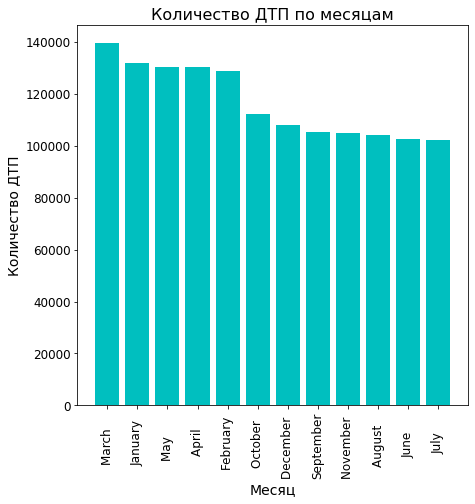

In [13]:
# строим график количества аварий по месяцам
plt.figure(figsize=(7, 7))

plt.bar(
    collisions_month_df['month'],
    collisions_month_df['collisions_count'],
    color='c'
)

plt.title("Количество ДТП по месяцам", fontsize=16)
plt.xlabel("Месяц", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel("Количество ДТП", fontsize=14)
plt.yticks(fontsize=12)
plt.show()

- Наибольшее количество аварий суммарно за весь период происходило в марте. 

- Наиболее аварийный период (суммарно за все годы) - весенне-зимний - с января по апрель. Видимо, это месяцы с самыми непредсказуемыми и сложными дорожными условиями. 

- Наименьшее количество аварий зафиксировано летом. Сказывается продолжительность светового дня и состояние дорожного покрытия.  

- Изучим картину отдельно по годам.

In [14]:
# выгружаем данные по годам
collisions_month_year = ''' 
SELECT EXTRACT('Year' FROM collision_date)::numeric::integer AS collision_year,
       COUNT(DISTINCT(EXTRACT(MONTH FROM collision_date))) AS month_qty,
       COUNT(case_id) AS collisions_qty,
       COUNT(case_id)/COUNT(DISTINCT(EXTRACT('Month' FROM collision_date))) AS mean_case
FROM collisions
GROUP BY collision_year
ORDER by collision_year
'''

collisions_month_year_df = get_query(collisions_month_year)
display(collisions_month_year_df)

,collision_year,month_qty,collisions_qty,mean_case
0,2009,12,426228,35519
1,2010,12,416490,34707
2,2011,12,402428,33535
3,2012,12,154547,12878
4,2013,6,305,50
5,2020,2,2,1


- Наибольшая аварийность зафиксирована в 2009 году. 

- Данные за 2013 и 2020 годы неполные. 

- Посмотрим данные в разбивке по месяцам. Неполные данные отсечем.  

In [15]:
# формируем запрос по аварийности в разбивке по годам и месяцам
query_year_month = '''
SELECT year, 
       to_char(to_timestamp(month::text, 'MM'), 'Month') AS month,
       collisions_count
FROM (SELECT EXTRACT(YEAR FROM collision_date)::numeric::integer AS year, 
             EXTRACT(MONTH FROM collision_date)::numeric::integer AS month,
             COUNT(DISTINCT case_id) AS collisions_count
      FROM collisions
      GROUP BY year, month
      ORDER BY year, month) AS q_y_m
WHERE year < 2013;
'''

# выгружаем данные
query_year_month_df = get_query(query_year_month) 
display(query_year_month_df)

,year,month,collisions_count
0,2009,January,35062
1,2009,February,34480
2,2009,March,36648
3,2009,April,35239
4,2009,May,36916
5,2009,June,34202
6,2009,July,35161
7,2009,August,34508
8,2009,September,35555
9,2009,October,37835


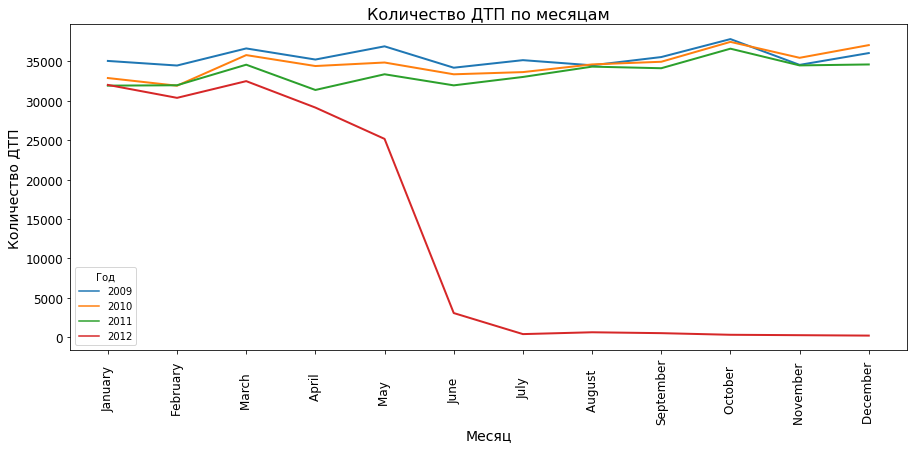

In [16]:
# строим график
plt.figure(figsize=(15, 6))
sns.lineplot(x='month',
             y='collisions_count',
             hue='year',
             data=query_year_month_df,
             palette='tab10', linewidth=2)

plt.title("Количество ДТП по месяцам", fontsize=16)
plt.xlabel("Месяц", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel("Количество ДТП", fontsize=14)
plt.yticks(fontsize=12)
plt.legend(title='Год') 
plt.show()

- Выведем отдельно данные за 2012 год, добавив расчет доли по месяцам.

In [17]:
# формируем запрос по аварийности за 2012 год 
query_year_month = '''
SELECT year, 
       to_char(to_timestamp(month::text, 'MM'), 'Month') AS month,
       collisions_count,
       ROUND((collisions_count/SUM(collisions_count) OVER ())*100, 2) AS persent

FROM (SELECT EXTRACT(YEAR FROM collision_date)::numeric::integer AS year, 
             EXTRACT(MONTH FROM collision_date)::numeric::integer AS month,
             COUNT(DISTINCT case_id) AS collisions_count
      FROM collisions
      GROUP BY year, month
      ORDER BY year, month) AS q_y_m
WHERE year = 2012;
'''

# выгружаем данные
display(get_query(query_year_month)) 

,year,month,collisions_count,persent
0,2012,January,32020,20.72
1,2012,February,30377,19.66
2,2012,March,32498,21.03
3,2012,April,29143,18.86
4,2012,May,25168,16.29
5,2012,June,3062,1.98
6,2012,July,390,0.25
7,2012,August,622,0.40
8,2012,September,510,0.33
9,2012,October,304,0.20


**Вывод:**

- Если смотреть суммарные данные за весь период, то наибольшее количество аварий происходило в марте, а наиболее аварийный период - весенне-зимний - с января по апрель. Наименьшее же количество аварий зафиксировано летом. 


- Если сравнивать месяцы внутри каждого года, то наибольший пик аварийности приходится на октябрь - период первых повсеместных гололедных явлений, которым не все водители оказываются готовы. 


- Наименьшая аварийность, во все годы, кроме 2009, наблюдается в феврале. В 2009 году наименьшее количество ДТП произошло в июне. 


- Очень сильный дисбаланс данных за 2012 год. Начиная с апреля кривая аварийности резко идет вниз. Доля зафиксированных аварий за первую половину года составляет 97% от всех аварий за год. Что странно. Видимо, данные неполные.  Заказчик утверждает, что данные самые свежие. Необходимо учесть это при подготовке признаков для обучения.

### Аналитические задачи для коллег

 - Создадим для коллег аналитические задачи, описывающие факторы ДТП.

#### Задача 1. Самые частые причины ДТП.

**Требуется определить самые частые причины ДТП.**

 - Для решения задачи необходимо сформировать sql-запрос к таблице collision: сгруппировать таблицу по полю primary_collision_factor (основной фактор аварии) и посчитать количество происшествий, исключая пропуски и неизвестные факторы.
 
 
 - После создания запроса построим график. 

In [18]:
# формируем запрос к таблице collisions по полю primary_collision_factor
primary_collision_factor = '''
SELECT primary_collision_factor,
       COUNT(case_id) AS collisions_count
FROM collisions
WHERE primary_collision_factor IS NOT NULL 
  AND primary_collision_factor NOT IN ('unknown')
GROUP BY primary_collision_factor
ORDER BY collisions_count DESC;
'''

primary_collision_factor_df = get_query(primary_collision_factor)
display(primary_collision_factor_df)

,primary_collision_factor,collisions_count
0,vehicle code violation,1316453
1,other than driver,29780
2,other improper driving,8470
3,fell asleep,117


- Для удобства чтения графика переведем факторы ДТП на русский. 

In [19]:
# переименовываем значения
primary_collision_factor_df.replace(
    ['vehicle code violation', 
     'other than driver', 
     'other improper driving',  
     'fell asleep',   
],
    ['Нарушение правил ПДД', 
     'Кроме водителя', 
     'Другое неправильное вождение',
     'Заснул'
], 
        regex=True, inplace=True) 

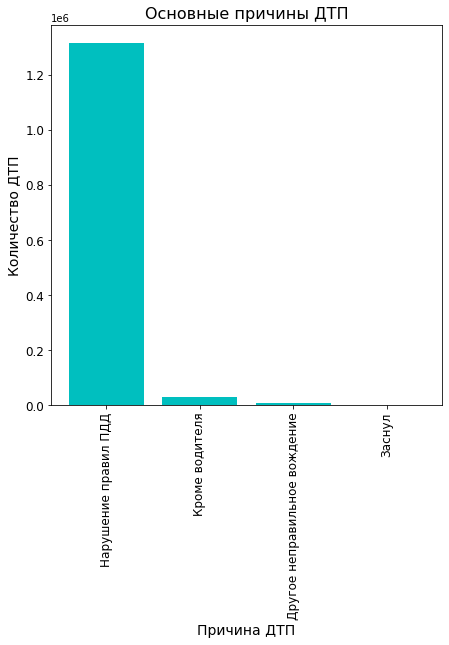

In [20]:
# строим график количества ДТП по их пичинам 
plt.figure(figsize=(7, 7))

plt.bar(
    primary_collision_factor_df['primary_collision_factor'],
    primary_collision_factor_df['collisions_count'],
    color='c'
)

plt.title("Основные причины ДТП", fontsize=16)
plt.xlabel("Причина ДТП", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel("Количество ДТП", fontsize=14)
plt.yticks(fontsize=12)
plt.show()

**Вывод:**

- Самая частая причина ДТП - нарушение правил ПДД.

- Самая редкая - уснул за рулем.  

#### Задача 2. Взаимосвязь факторов ДТП и наличия ГТС в ТС.

**Требуется определить взаимосвязь между факторами ДТП и наличием оборудования громкой телефонной связи в автомобиле.**

 - Для решения задачи необходимо сформировать sql-запрос к двум таблицам: collision и parties: 
   
    - Нужные данные находятся, соответственно, в полях primary_collision_factor (основной фактор аварии) и cellphone_in_use (наличие громкой телефонной связи в автомобиле нет/да).
    
    - Из запроса необходимо исключить пропуски и неизвестные факторы.
    
    
 - После создания запроса нужно построить график.     

In [21]:
# формируем запрос к таблице collisions и parties
violation_cellphone = '''
SELECT c.primary_collision_factor,
       p.cellphone_in_use,     
       COUNT(p.case_id) AS collisions_count
FROM collisions AS c
JOIN parties AS p ON c.case_id=p.case_id
WHERE c.primary_collision_factor IS NOT NULL
  AND p.cellphone_in_use IS NOT NULL
  AND c.primary_collision_factor NOT IN ('unknown')
  AND p.party_type = 'car'
GROUP BY c.primary_collision_factor, p.cellphone_in_use
ORDER BY c.primary_collision_factor DESC, collisions_count DESC;
'''

violation_cellphone_df = get_query(violation_cellphone)
display(violation_cellphone_df)

,primary_collision_factor,cellphone_in_use,collisions_count
0,vehicle code violation,0,1965292
1,vehicle code violation,1,42051
2,other than driver,0,32689
3,other than driver,1,623
4,other improper driving,0,7888
5,other improper driving,1,166
6,fell asleep,0,30
7,fell asleep,1,3


 - Для удобства переименуем значения и переведем на русский.

In [22]:
# переименовываем значения
violation_cellphone_df.replace(
    ['vehicle code violation', 
     'other than driver', 
     'other improper driving',  
     'fell asleep',
     0,
     1
],
    ['Нарушение правил ПДД', 
     'Кроме водителя', 
     'Другое неправильное вождение',
     'Заснул',
     'Нет',
     'Да'
], 
        regex=True, inplace=True) 

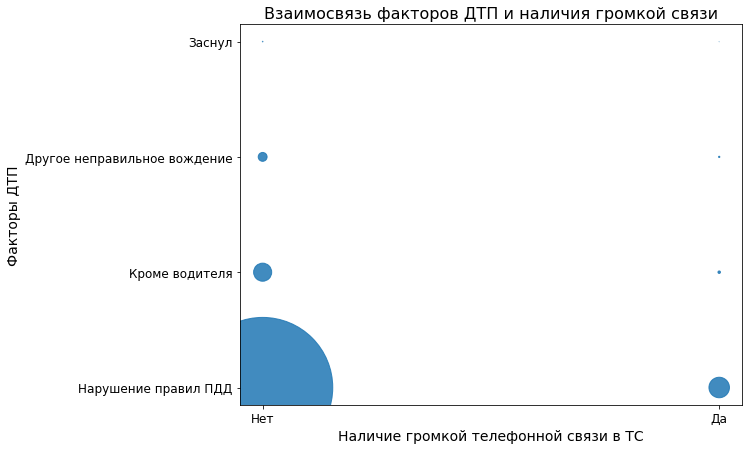

In [23]:
# строим график взаимосвязи категории нарушения и наличия громкой связи
plt.figure(figsize=(9, 7))

plt.scatter(
    violation_cellphone_df['cellphone_in_use'], 
    violation_cellphone_df['primary_collision_factor'],   
    alpha=0.85,
    s=violation_cellphone_df['collisions_count']*0.01
)

plt.title("Взаимосвязь факторов ДТП и наличия громкой связи", fontsize=16)
plt.xlabel("Наличие громкой телефонной связи в ТС", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Факторы ДТП", fontsize=14)
plt.yticks(fontsize=12)
plt.show()

**Вывод:**

- Существует прямая зависимость между наличием или отсутствием громкой телефонной связи в автомобиле и количеством ДТП: и в том, и в другом случае водители разговаривают по телефону во время движения, но с громкой связью они меньше отвлекаются от дороги. 

#### Задача 3.  Взаимосвязь повреждений ТС и состояния участника ДТП.

**Требуется определить взаимосвязь между повреждениями ТС и состоянием участника ДТП.**

- Для решения задачи необходимо сформировать sql-запрос к двум таблицам: collision и parties: 
   
    - Нужные данные находятся, соответственно, в полях collision_damage (серьезность происшествия) и party_drug_physical (состояние участника: физическое или с учетом принятых лекарств).
    
    - Из запроса необходимо исключить пропуски и значения состояний Impairment Unknown (не известно) и Not Applicable (не оценивалось).
    
    
- После создания запроса нужно отобразить зависимость на графике.     

In [24]:
# формируем запрос к таблице collisions и parties
violation_phisical = '''
SELECT p.party_drug_physical,
       c.collision_damage,
       COUNT(p.case_id) AS collisions_count
FROM collisions AS c
JOIN parties AS p ON c.case_id=p.case_id
WHERE c.collision_damage IS NOT NULL
  AND c.collision_damage NOT IN ('unknown') 
  AND p.party_drug_physical IS NOT NULL
  AND p.party_drug_physical NOT IN ('G','not applicable')
  AND p.party_type = 'car'
GROUP BY p.party_drug_physical, c.collision_damage 
ORDER BY p.party_drug_physical DESC, collisions_count DESC;
'''

violation_phisical_df = get_query(violation_phisical)
display(violation_phisical_df)

,party_drug_physical,collision_damage,collisions_count
0,under drug influence,small damage,5901
1,under drug influence,fatal,2166
2,under drug influence,scratch,2105
3,under drug influence,middle damage,1646
4,under drug influence,severe damage,543
5,sleepy/fatigued,small damage,6973
6,sleepy/fatigued,scratch,2837
7,sleepy/fatigued,middle damage,2224
8,sleepy/fatigued,severe damage,376
9,sleepy/fatigued,fatal,132


- Для удобства чтения графика переведем строки на русский язык.

In [25]:
# переименовываем значения на более понятные
violation_phisical_df.replace(
    ['under drug influence', 
     'sleepy/fatigued', 
     'impairment - physical',  
     'small damage',
     'middle damage',
     'severe damage',
     'fatal', 
     'scratch'      
],
    ['Под воздействием лекарств', 
     'Сонный/Усталый', 
     'Ухудшение состояния',     
     'Отдельный элемент под замену / покраску', 
     'Машина в целом на ходу', 
     'Серьезное повреждение', 
     'Не подлежит восстановлению',
     'Царапина'
], 
        regex=True, inplace=True) 

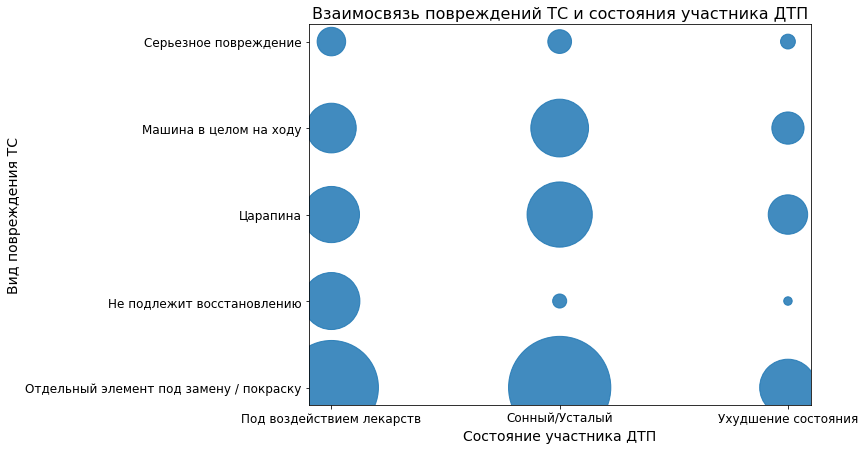

In [26]:
# строим график взаимосвязи категории нарушения и наличия громкой связи
plt.figure(figsize=(9, 7))

plt.scatter(
    violation_phisical_df['party_drug_physical'], 
    violation_phisical_df['collision_damage'],   
    alpha=0.85,
    s=violation_phisical_df['collisions_count']*1.5
)

plt.title("Взаимосвязь повреждений ТС и состояния участника ДТП", fontsize=16)
plt.xlabel("Состояние участника ДТП", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Вид повреждения ТС", fontsize=14)
plt.yticks(fontsize=12)
plt.show()

**Вывод:**

- Наибольший "вклад" в не фатальные повреждения транспортного средства вносит усталость водителя.  

- На первом месте по количеству повреждений - незначительные (Отдельный элемент под замену/покраску). "Царапина", как ни странно, первенство проигрывает. Видимо, не все водители фиксируют такие повреждения.  

- Самые серьезные, с точки зрения последствий для ТС, ДТП происходят, когда водитель находится под воздействием лекарств.

#### Задача 4. Взаимосвязь повреждений в момент ДТП и возраста ТС.

**Требуется проанализировать, существует ли связь между возрастом транспортного средства и характером повреждений в момент ДТП.** 


- Для решения задачи необходимо сформировать sql-запрос к двум таблицам: collision и vehicles:

    - Нужные данные находятся, соответственно, в полях collision_damage (серьезность происшествия) и vehicle_age (возраст автомобиля).    
    
    
- После создания запроса нужно построить график и написать вывод.     

#### Задача 5.  Взаимосвязь повреждений ТС и категории нарушения ПДД.

**Требуется определить зависимость между характером повреждений транспортного средства в момент ДТП и категорией нарушения ДТП. Насколько, например, нарушение скоростного режима будет иметь более серьезные последствия в случае ДТП, чем неправильная парковка?** 


- Для решения задачи необходимо сформировать sql-запрос к таблице: collision:

    - Нужные данные находятся в полях collision_damage (серьезность происшествия) и pcf_violation_category (категория нарушения). 
    -  Из запроса необходимо исключить пропуски и нарушения не относящиеся к автомобилю.
    
    
- После создания запроса нужно построить график и написать вывод. 

#### Задача 6. Взаимосвязь повреждений ТС и состояния дороги в момент ДТП.

**Требуется исследовать взаимосвязь между характером повреждений транспортного средства и состоянием дорожного покрытия в момент ДТП.**

- Для решения задачи необходимо сформировать sql-запрос к таблице collision:

    - Нужные данные находятся в полях collision_damage (серьезность происшествия) и road_condition_1(дорожное состояние).
    - Из запроса необходимо исключить пропуски.
    
    
- После создания запроса нужно построить график и написать вывод.  

### Вывод по третьему шагу

- Проанализировали самые частые причины ДТП.

- Создали 6 аналитических задач для коллег. 

- Разобрали порядок и реализацию решения трех задач из шести. 

## Создание модели для оценки водительского риска

 **План создания модели:**

- Подготовка набора данных на основе предложения заказчика.

- Первичный отбор факторов для модели.

- Статистическое исследование факторов.

   - Исследование данных.

   - Внесение корректировок в отобранные факторы.

   - Категоризация данных (в случае необходимости).
  
   - Формирование обучающей и тестовой выборок.
   
   - Кодирование категориальных и масштабирование количественных признаков. 

### Подготовка набора данных

- **Пожелание заказчика к параметрам:** 

   - Тип виновника - только машина (car);
   - Учесть все случаи повреждения автомобиля, кроме типа scratch; 
   - Для моделирования взять данные за 2012 год;
   - Учесть фактор возраста автомобиля;
   - Подготовить исходную таблицу с помощью SQL-запроса.

- **Сформируем соответствующий запрос:**   

  - Исключим из запроса очевидно лишние поля: 'case_id, 'party_number', 'party_type' (после отбора, в поле останется только одно значение), 'party_count' и 'id'. 
      
  - Явно приведем некоторые данные к нужному типу и переименуем некоторые поля. 

  - Разобьем поле даты на месяц, день недели, а в поле времени оставим только час. 

  - Исключим пропуски из поля с возрастом автомобиля, нам нужны чистые данные, а адекватно и объективно вычислить возраст автомобиля по имеющейся базе невозможно. 

In [27]:
# отбираем первичные параметры
query_base = '''
SELECT cellphone_in_use, 
       collision_damage,
       EXTRACT(MONTH FROM collision_date)::int AS month,
       to_char(collision_date, 'day') AS day_of_week,
       EXTRACT(HOUR FROM collision_time) AS hour, 
       control_device, 
       county_city_location,
       county_location, 
       direction, 
       distance, 
       insurance_premium, 
       intersection, 
       lighting, 
       location_type, 
       motor_vehicle_involved_with, 
       party_drug_physical, 
       party_sobriety, 
       pcf_violation_category,
       primary_collision_factor, 
       road_condition_1 AS road_condition, 
       road_surface,
       type_of_collision, 
       vehicle_age,
       vehicle_transmission, 
       vehicle_type,
       weather_1 AS weather,
       at_fault 
      
FROM collisions AS c
JOIN parties AS p ON c.case_id=p.case_id
RIGHT JOIN vehicles AS v ON (c.case_id=v.case_id AND p.party_number=v.party_number)
WHERE p.party_type = 'car'
  AND EXTRACT(YEAR FROM c.collision_date) = 2012
  AND collision_damage != 'scratch'
  AND vehicle_age IS NOT NULL;

'''

# выгружаем таблицу
query_base_df = get_query(query_base)
display(query_base_df.sample(5))

# закрываем соединение с базой данных для экономии ресурсов 
connection.dispose()

# выводим информацию о датасете
query_base_df.info()

,cellphone_in_use,collision_damage,month,day_of_week,hour,control_device,county_city_location,county_location,direction,distance,insurance_premium,intersection,lighting,location_type,motor_vehicle_involved_with,party_drug_physical,party_sobriety,pcf_violation_category,primary_collision_factor,road_condition,road_surface,type_of_collision,vehicle_age,vehicle_transmission,vehicle_type,weather,at_fault
7183,0.0,severe damage,1,thursday,9.0,functioning,1942,los angeles,None,0.0,48.0,1.0,daylight,None,other motor vehicle,None,"had been drinking, impairment unknown",traffic signals and signs,vehicle code violation,normal,dry,broadside,7,manual,coupe,clear,0
38493,0.0,middle damage,3,friday,16.0,none,3400,sacramento,south,2640.0,71.0,0.0,daylight,highway,other motor vehicle,None,had not been drinking,speeding,vehicle code violation,normal,dry,rear end,5,auto,sedan,clear,0
27550,0.0,small damage,2,saturday,14.0,functioning,3105,placer,west,0.0,62.0,0.0,daylight,None,other motor vehicle,None,had not been drinking,speeding,vehicle code violation,normal,dry,rear end,9,auto,sedan,clear,0
53414,0.0,middle damage,5,saturday,21.0,functioning,1942,los angeles,east,50.0,30.0,0.0,dark with street lights,None,other motor vehicle,None,had not been drinking,traffic signals and signs,vehicle code violation,normal,dry,broadside,5,auto,sedan,clear,1
51172,0.0,small damage,5,saturday,13.0,none,1900,los angeles,east,50.0,62.0,0.0,daylight,None,other motor vehicle,None,had not been drinking,speeding,vehicle code violation,normal,dry,rear end,10,auto,sedan,clear,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54554 entries, 0 to 54553
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cellphone_in_use             50384 non-null  float64
 1   collision_damage             54554 non-null  object 
 2   month                        54554 non-null  int64  
 3   day_of_week                  54554 non-null  object 
 4   hour                         54470 non-null  float64
 5   control_device               54348 non-null  object 
 6   county_city_location         54554 non-null  object 
 7   county_location              54554 non-null  object 
 8   direction                    42097 non-null  object 
 9   distance                     54554 non-null  float64
 10  insurance_premium            54135 non-null  float64
 11  intersection                 54386 non-null  float64
 12  lighting                     54402 non-null  object 
 13  location_type   

**Вывод:**

- Исходные данные выгрузили. Займемся отбором признаков для обучения. 

### Первичный отбор признаков

**Факторы, влияющие на прогнозирование ДТП:**

- **at_fault** - целевой показатель;


- **cellphone_in_use** - возможность разговаривать по громкой связи. Отсутствие такого устройства, то есть использование разговор по мобильному за рулем может привести к ДТП;


- **collision_date** - месяц и день недели происшествия. Сезонность, загруженность и   состояние трассы, может повлиять на прогноз;


- **collision_time** - час происшествия. Состояние водителя и уровень освещенности однозначно влияют на вероятность попасть в ДТП;


- **control_device** - устройство управления. Скорее всего, имеется в виду - круиз-контроль. Несомненно влияет на управляемость ТС, следовательно, на аварийность;


- **county_location** – название географического района. Особенности той ли иной местности (рельеф, ландшафт и т.д.) оказывают прямое влияние на вероятность возникновения ДТП;


- **direction** – направление. Всегда учитывается при прогнозировании происшествий;


- **distance** – расстояние до главной дороги. Чем ближе к главной дороге, тем выше трафик, и, следовательно, вероятность возникновения ДТП, и наоборот;


- **intersection** – перекресток. На перекрестках интенсивность движения выше, и, стало быть, влияние на возникновение ДТП сильнее;


- **lightning** – освещение. Влияет на видимость и на прогноз ДТП;


- **location_type** - тип дороги. Оказывает влияние на характер покрытия и на вероятность возникновения ДТП. Одно из значений дублирует значение поля признака intersection;


- **road_condition** – состояние дороги. Плохое состояние дороги может приводить к аварийной ситуации;


- **road_surface** - состояние дорожного покрытия. Скользкое или обледенелое дорожное покрытие – явная потенциальная опасность, с точки зрения ДТП;


- **vehicle_age** - возраст автомобиля. Напрямую влияет на управляемость автомобиля и вероятность возникновения нештатной ситуации; 


- **vehicle_transmission** - тип КПП. Влияет на скорость реакции водителя и управляемость ТС; 


- **vehicle_type** - тип кузова. Влияет на водительский обзор, следовательно, на вероятность ДТП;


- **weather** – погода. Напрямую влияет на видимость и сцепление с дорогой, т.е. на уровень риска возникновения происшествий. Сочетается с признаком road_surface.


**Факторы, не влияющие на прогнозирование ДТП:**

- **collision_damage** - серьезность повреждения (все, кроме scratch). Влияет на последствия ДТП, а не на его прогнозирование;


- **county_city_location** - номер географического района. Числовой синоним другого признака - географического района. Может негативно повлиять на обучение, кроме того неудобен при интерпретации результатов;


- **insurance_premium** - имеет отношение к последствиям ДТП, а не к вероятности его возникновения; 


- **type_of_collision**   - тип аварии. Не влияет на прогноз ДТП.  

**Факторы, которые могли бы привести к ДТП, но не могут быть оценены до поездки:**

- **pcf_violation_category** - категория нарушения ПДД. Имеет значение, когда ДТП уже произошло.  


- **party_drug_physical** - состояние участника. Определенно влияет, но оценить его до начала поездки не представляется возможным;


- **party_sobriety** - трезвость участника. Также влияет, но ее не оценить до начала поездки.


- **primary_collision_factor** - основной фактор аварии. Зависит от каждого отдельного случая и имеет значение в момент происшествия.

**Фактор, требующий дополнительного изучения:**

- **motor_vehicle_involved_with** - дополнительные участники ДТП. С одной стороны, не может повлиять на прогноз, так как характеризует маршрут по уровню опасности встречающихся на нем препятствий в момент происшествия. С другой - обращает внимание на наличие по выбранному маршруту характерных для него препятствий, таких как, например, велосипедист или животное.

In [28]:
# формируем список столбцов для удаления
columns_drop = ['collision_damage',
                'county_city_location',
                'insurance_premium',
                'type_of_collision', 
                'pcf_violation_category', 
                'party_drug_physical',
                'party_sobriety',  
                'primary_collision_factor'
               ] 

In [29]:
# оставляем в датафрйеме только выбранные столбцы
data=query_base_df.drop(columns_drop, axis=1)  
# проверяем 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54554 entries, 0 to 54553
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cellphone_in_use             50384 non-null  float64
 1   month                        54554 non-null  int64  
 2   day_of_week                  54554 non-null  object 
 3   hour                         54470 non-null  float64
 4   control_device               54348 non-null  object 
 5   county_location              54554 non-null  object 
 6   direction                    42097 non-null  object 
 7   distance                     54554 non-null  float64
 8   intersection                 54386 non-null  float64
 9   lighting                     54402 non-null  object 
 10  location_type                25511 non-null  object 
 11  motor_vehicle_involved_with  54407 non-null  object 
 12  road_condition               54317 non-null  object 
 13  road_surface    

**Вывод:**

- Признаки отобрали. Проведем их статистическое исследование.

### Статистическое исследование факторов

**Предварительно исследуем данные.**

In [30]:
# знакомимся с данными, выводим пять случайных строк, явные и относительные дубликаты и пропуски
def data_info(data):
    d = {'data' : data}
    for a, i in d.items():
        # дубликаты
        print('Датасет:',a,'абсолютное количество явных дубликатов:',i.duplicated().sum())    
        print('Датасет:',a,'относительное количество явных дубликатов, % :',round(i.duplicated().mean()*100,2))
        print()
        # пропуски
        print('Датасет:',a,'абсолютное количество пропусков:')
        print(i.isna().sum().sort_values()) 
        print()
        print('Датасет:',a,'относительное количество пропусков, % :')    
        print(round(i.isna().mean()*100,2).sort_values())
        # строки и инфо
        display(i.sample(5))
        print()
        i.info()
# выводим         
data_info(data)  

Датасет: data абсолютное количество явных дубликатов: 187
Датасет: data относительное количество явных дубликатов, % : 0.34

Датасет: data абсолютное количество пропусков:
at_fault                           0
month                              0
day_of_week                        0
vehicle_type                       0
county_location                    0
vehicle_age                        0
distance                           0
hour                              84
motor_vehicle_involved_with      147
lighting                         152
weather                          165
intersection                     168
control_device                   206
road_condition                   237
road_surface                     329
vehicle_transmission             575
cellphone_in_use                4170
direction                      12457
location_type                  29043
dtype: int64

Датасет: data относительное количество пропусков, % :
at_fault                        0.00
month               

,cellphone_in_use,month,day_of_week,hour,control_device,county_location,direction,distance,intersection,lighting,location_type,motor_vehicle_involved_with,road_condition,road_surface,vehicle_age,vehicle_transmission,vehicle_type,weather,at_fault
46557,0.0,4,wednesday,16.0,none,alameda,south,2640.0,0.0,daylight,None,non-collision,normal,dry,4,manual,coupe,cloudy,1
47416,0.0,3,sunday,8.0,functioning,fresno,east,75.0,0.0,daylight,None,other motor vehicle,normal,dry,0,auto,sedan,clear,0
46249,NaN,3,thursday,18.0,functioning,san diego,east,75.0,0.0,dusk or dawn,None,other motor vehicle,normal,dry,8,auto,sedan,clear,0
16949,0.0,3,saturday,13.0,functioning,riverside,east,22.0,0.0,daylight,None,other motor vehicle,normal,wet,2,None,sedan,raining,0
49320,0.0,1,wednesday,10.0,none,los angeles,south,140.0,0.0,daylight,highway,other motor vehicle,normal,dry,7,manual,coupe,clear,1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54554 entries, 0 to 54553
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cellphone_in_use             50384 non-null  float64
 1   month                        54554 non-null  int64  
 2   day_of_week                  54554 non-null  object 
 3   hour                         54470 non-null  float64
 4   control_device               54348 non-null  object 
 5   county_location              54554 non-null  object 
 6   direction                    42097 non-null  object 
 7   distance                     54554 non-null  float64
 8   intersection                 54386 non-null  float64
 9   lighting                     54402 non-null  object 
 10  location_type                25511 non-null  object 
 11  motor_vehicle_involved_with  54407 non-null  object 
 12  road_condition               54317 non-null  object 
 13  road_surface   

- Избавимся от полных дубликатов. 

In [31]:
# удаляем явные дубликаты
data.drop_duplicates(inplace=True, ignore_index=True)

# проверяем
print(data.duplicated().sum())
data.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54367 entries, 0 to 54366
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cellphone_in_use             50207 non-null  float64
 1   month                        54367 non-null  int64  
 2   day_of_week                  54367 non-null  object 
 3   hour                         54283 non-null  float64
 4   control_device               54161 non-null  object 
 5   county_location              54367 non-null  object 
 6   direction                    41980 non-null  object 
 7   distance                     54367 non-null  float64
 8   intersection                 54200 non-null  float64
 9   lighting                     54215 non-null  object 
 10  location_type                25432 non-null  object 
 11  motor_vehicle_involved_with  54220 non-null  object 
 12  road_condition               54131 non-null  object 
 13  road_surface  

- Снова проверим пропуски. 

In [32]:
round(data.isna().mean()*100,2).sort_values()

at_fault                        0.00
month                           0.00
day_of_week                     0.00
vehicle_type                    0.00
county_location                 0.00
vehicle_age                     0.00
distance                        0.00
hour                            0.15
motor_vehicle_involved_with     0.27
lighting                        0.28
weather                         0.30
intersection                    0.31
control_device                  0.38
road_condition                  0.43
road_surface                    0.60
vehicle_transmission            1.06
cellphone_in_use                7.65
direction                      22.78
location_type                  53.22
dtype: float64

- Все строки с долей пропущенных значений ниже 1.5% можно безболезненно удалить. 

In [33]:
# задаем столбцы для удаления пропусков 
column_dropna = ['hour', 
                 'motor_vehicle_involved_with',
                 'lighting',
                 'weather', 
                 'intersection',
                 'control_device',
                 'road_condition', 
                 'road_surface',
                 'vehicle_transmission']

In [35]:
# сбрасываем индексы
data.reset_index(drop= True , inplace= True)
# смотрим инфо 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52591 entries, 0 to 52590
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cellphone_in_use             48816 non-null  float64
 1   month                        52591 non-null  int64  
 2   day_of_week                  52591 non-null  object 
 3   hour                         52591 non-null  float64
 4   control_device               52591 non-null  object 
 5   county_location              52591 non-null  object 
 6   direction                    40819 non-null  object 
 7   distance                     52591 non-null  float64
 8   intersection                 52591 non-null  float64
 9   lighting                     52591 non-null  object 
 10  location_type                24887 non-null  object 
 11  motor_vehicle_involved_with  52591 non-null  object 
 12  road_condition               52591 non-null  object 
 13  road_surface    

In [34]:
# удаляем пропуски
data.dropna(subset=column_dropna, inplace=True)

# проверяем
round(data.isna().mean()*100,2).sort_values()

lighting                        0.00
vehicle_type                    0.00
vehicle_transmission            0.00
vehicle_age                     0.00
road_surface                    0.00
road_condition                  0.00
motor_vehicle_involved_with     0.00
weather                         0.00
at_fault                        0.00
distance                        0.00
county_location                 0.00
control_device                  0.00
hour                            0.00
day_of_week                     0.00
month                           0.00
intersection                    0.00
cellphone_in_use                7.18
direction                      22.38
location_type                  52.68
dtype: float64

- **Проведем дополнительное исследование данных.** 

In [36]:
# смотрим уникальные значения в столбцах 
columns = data.columns
def values_unique(data):
    for column in columns:
        values1 = data[column].unique()
        values2 = data[column].nunique()
        values3 = data[column].value_counts(normalize=True)
        print('Уникальные значения столбца:', column)
        print(values1)
        print('Количество уникальных значений столбца:', column)
        print(values2)
        print('Относительное распределение уникальных значений столбца:', column)
        print(values3)
        print()
    
values_unique(data)      

Уникальные значения столбца: cellphone_in_use
[ 0. nan  1.]
Количество уникальных значений столбца: cellphone_in_use
2
Относительное распределение уникальных значений столбца: cellphone_in_use
0.0    0.979802
1.0    0.020198
Name: cellphone_in_use, dtype: float64

Уникальные значения столбца: month
[ 4  5  2 12 11  1  3 10  8  7  9  6]
Количество уникальных значений столбца: month
12
Относительное распределение уникальных значений столбца: month
3     0.205415
4     0.193474
1     0.191440
2     0.182427
5     0.172121
6     0.023065
8     0.006807
9     0.006123
7     0.005971
11    0.004849
10    0.004792
12    0.003518
Name: month, dtype: float64

Уникальные значения столбца: day_of_week
['sunday   ' 'wednesday' 'friday   ' 'monday   ' 'thursday ' 'saturday '
 'tuesday  ']
Количество уникальных значений столбца: day_of_week
7
Относительное распределение уникальных значений столбца: day_of_week
saturday     0.166721
friday       0.164610
sunday       0.143656
thursday     0.137191
we

- Построим графики для наглядности.

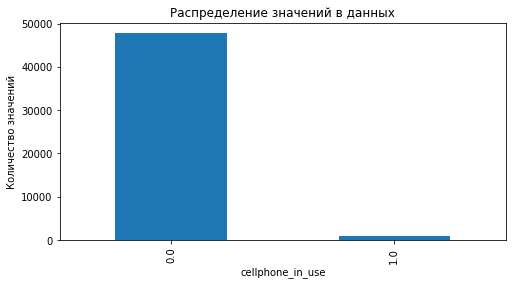

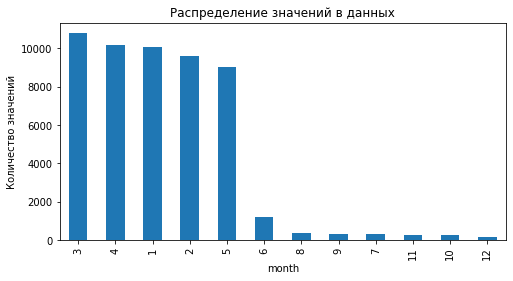

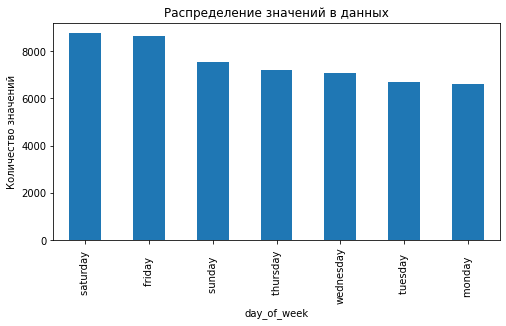

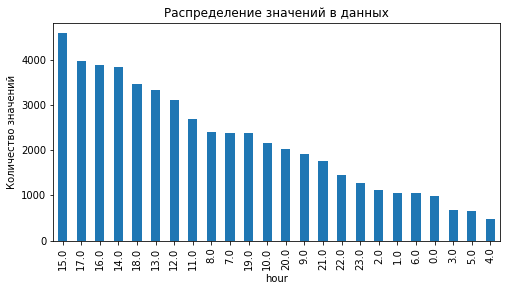

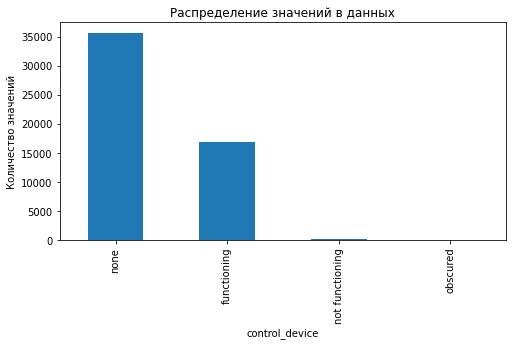

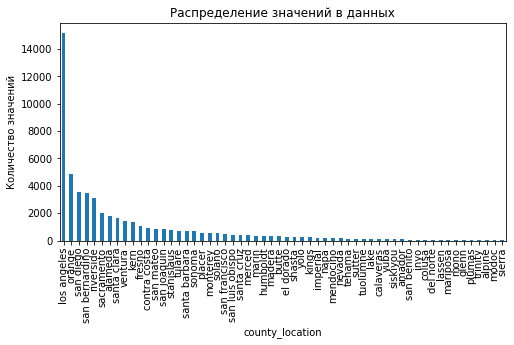

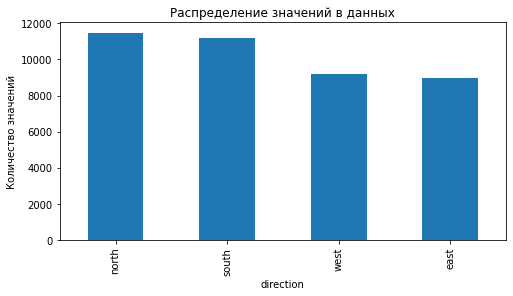

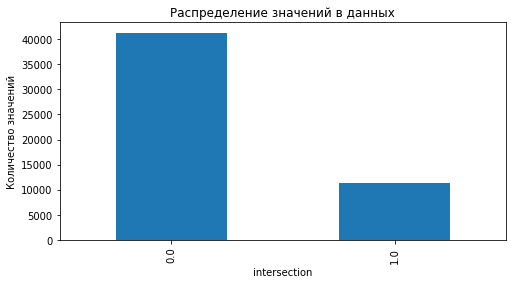

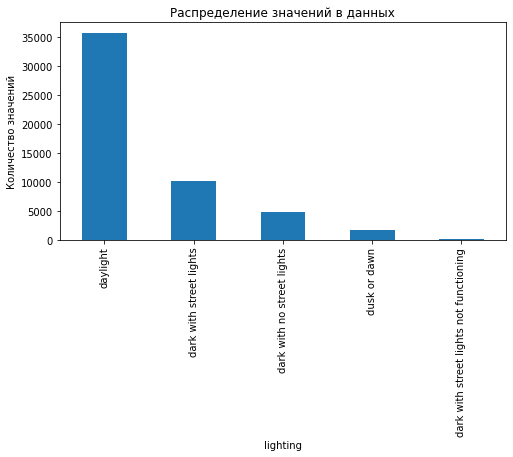

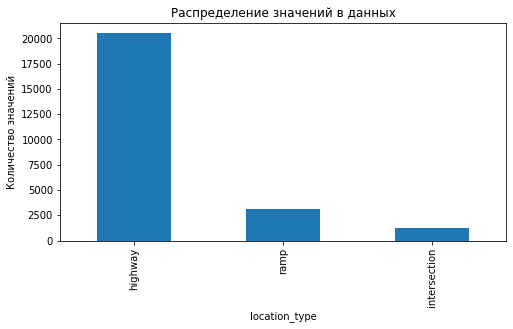

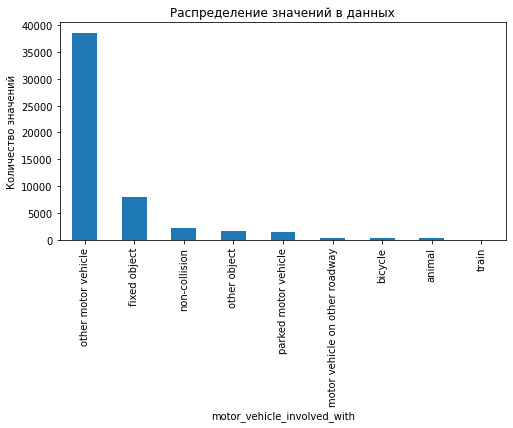

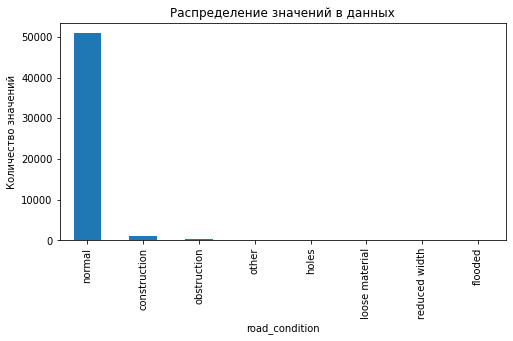

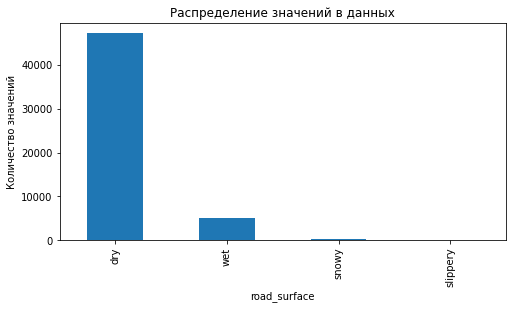

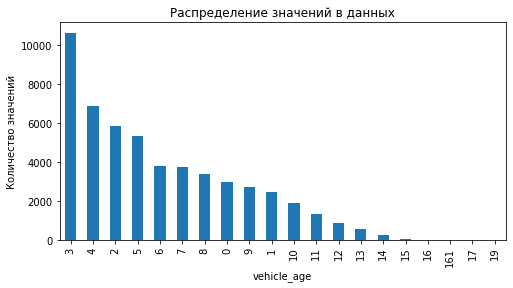

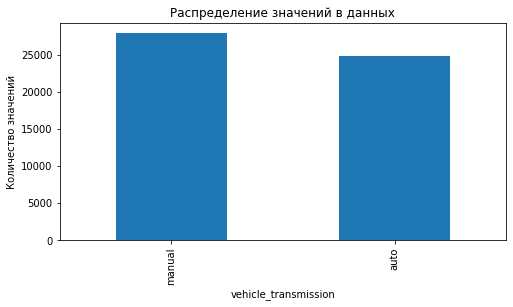

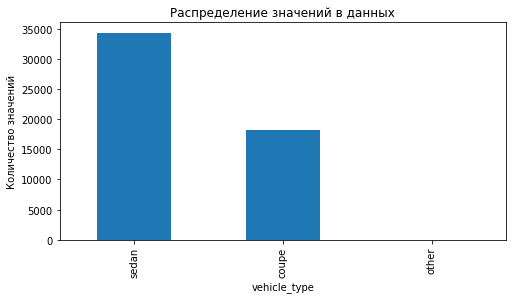

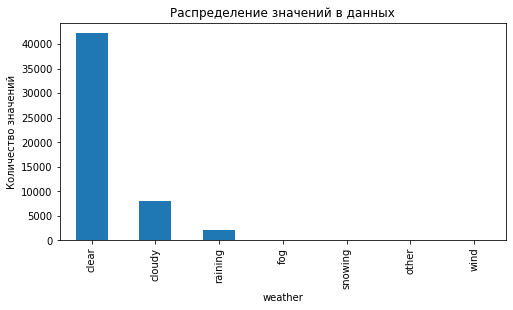

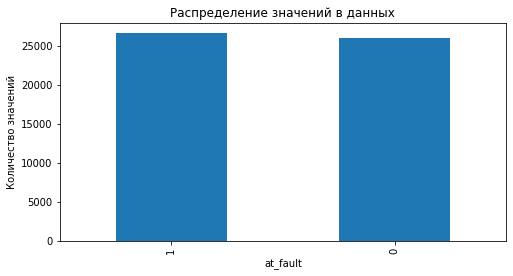

In [37]:
# смотрим признаки с числовыми  категориальными данными на столбчатых диаграммах
columns_plot = data.columns[~data.columns.isin(['distance'])]

def plot_bar(data, size):
    for column in columns_plot:
        
        plt.figure(figsize=size)
        data[column].value_counts().plot(kind='bar')                         
    
        plt.grid=True        
        plt.legend=False 
        plt.xlabel(column)
        plt.ylabel('Количество значений')
        plt.title('Распределение значений в данных')
        plt.show()       
        
plot_bar(data,(8,4))

- Уменьшим размерность признака до 100 метров и посмотрим распределение и выбросы.

In [38]:
# уменьшаем размерность 
data['distance'] = data['distance']/100

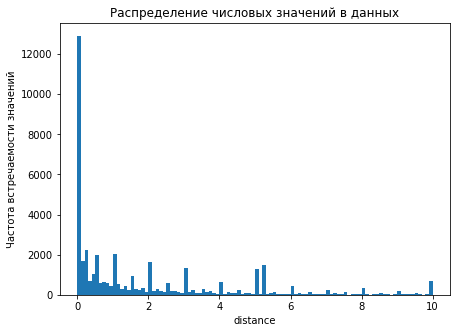

In [39]:
# строим гистограмму для числового признака 
# задаем диапазон в пределах километра
df_distance =  data.loc[data['distance']<=10]

plt.figure(figsize=(7,5))
df_distance['distance'].plot(bins=100, kind='hist')                             
plt.grid=True
plt.legend=False 
plt.xlabel('distance')
plt.ylabel('Частота встречаемости значений')
plt.title('Распределение числовых значений в данных')
plt.show()       

In [40]:
# смотрим на распределение значений distance в таблице
data['distance'].describe()

count    52591.000000
mean         8.846304
std         74.712852
min          0.000000
25%          0.100000
50%          1.500000
75%          6.000000
max      15840.000000
Name: distance, dtype: float64

In [41]:
# выберем диапазон до 90 квантиля 
df_query = data[data['distance'] < data['distance'].quantile(.90)]
df_query['distance'].describe()

count    47266.000000
mean         2.956333
std          4.204602
min          0.000000
25%          0.000000
50%          1.000000
75%          4.260000
max         19.950000
Name: distance, dtype: float64

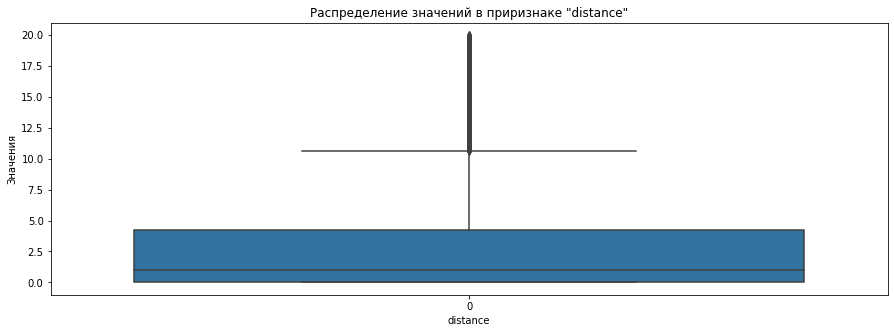

In [42]:
# смотрим разброс числового признака
plt.figure(figsize=(15, 5))    
sns.boxplot(data=df_query['distance'])
plt.xlabel('distance')
plt.ylabel('Значения')
plt.title('Распределение значений в признаке "distance"')
plt.show() 

**Описание признаков и план на предобработку и корректировку:**

- **cellphone_in_use**  
  - Машины без громкой связи составляют 98% представленного в базе автопарка. То есть такое устройство присутствует только в 2% автомобилей. Наверняка пропуск означает отсутствие устройства, но предварительно проверим взаимосвязь возраста автомобиля и наличия в нем ГТС. 
  - Тип данных изменим на целочисленный. 

- **month** 
  - Налицо явный дисбаланс данных: вторая половина года представлена намного хуже. Возможно, модель будет некорректно предсказывать риск аварийности, но заказчик настаивает на использовании предоставленных данных. 

- **day_of_week** 
  - Значения распределены равномерно по дням недели, но в названиях появились ненужные пробелы. Удалим их.
   
- **hour**

  - Заменим тип данных на целочисленный. Переведем признак часа - в признак с меньшим числом категорий - временем суток. 

- **control_device** 

  -  Доля значений "not functioning" и "obscured" (скрытый) незначительна, кроме того, "not functioning" (не функционирует), фактически, означает - "none". Объединим категории ("not functioning" и "none") и удалим лишние значения ("obscured"). 

- **county_location** 

  - Большая часть данных из Лос-Анджелеса. Скорректируем названия - заменим пробел на символ подчеркивания. 

- **direction** 

  - Значения распределены равномерно. Предположить причину появления пустых значений не представляется возможным. Найти взаимосвязь пропусков со значениями других признаков - тоже.  Заменим пропуски на значение 'other'.

- **distance** 

  - Единственный количественный числовой признак. Значение 0, видимо, означает, что ДТП произошло либо на перекрестке, либо непосредственно на главной дороге. Основная доля ДТП произошла именно здесь. Удалим аномальные значения и выбросы: все что свыше километра не имеет информативной ценности.

- **intersection** 

  - Значения дублируются значениями другого признака - *location_type = 'intersection'*. Удалим лишний признак. 

- **lightning** 

  - Основная масса ДТП происходила при дневном свете или в темное время суток при уличном освещении, то есть в городах.  Значение Dark-No Street Lights (Темно-Нет уличных фонарей) вполне может означать проселочную дорогу  в темное время суток, но категория Dark-Street Lights Not Functioning очень малочисленная. Объединим Dark-No Street Lights и Dark-Street Lights Not Functioning.

- **location_type** 

  - В столбце много пропусков. По всей видимости, в категориях intersection и ramp. Часть пропусков можно заменить на значение "intersection" - соответствующее значению 1 в столбце "intersection".  

- **motor_vehicle_involved_with** 

  - Основная доля значений - other motor vehicle (столкновение с другим автомобилем), что мало поможет в предсказании вероятности риска.  Удалим лишний признак.

- **road_condition** 

  - Основная масса ДТП происходила на обычной дороге, что не удивительно, ведь там движение более интенсивное. Возможно, признак пригодится при прогнозировании минимального риска водителя.   

- **road_surface** 

  - Самое частое значение - dry.  Очевидно, что у признака есть связь с погодой, но погода в ситуации предсказания вероятности ДТП важнее: будет ли дорога сухой или скользкой по пути следования - неизвестно, а если идет дождь, то это само собой разумеется. Также очевидна связь состояния дороги с временем года. Тем более, что состояние дороги становится известно только в момент ДТП. Удалим лишний признак.

- **vehicle_age**
 
  - Больше половины машин, попавших в ДТП - моложе пяти лет -  это самая массовая категория. Возможна связь возраста с наличием автоматической коробки передач и  оборудования для громкой связи. Скорректируем аномальное значение (161). Скорее всего это отсутствующее в списке 18.

- **vehicle_transmission** 

  - ТС с АКПП и ручной коробкой почти поровну.   

- **vehicle_type** 

  - Седан и купе самые многочисленные значения. Значением "other" можно пренебречь.
  
- **weather**  
  
  - Чаще всего ДТП случались в ясную погоду. Видимо, это связано с количеством машин на дороге: водители в дождь, слякоть, гололед предпочитают меньше пользоваться личным транспортом. Признак наверняка имеет связь с признаком "road_condition".  Значений "other" и "wind" настолько мало, что их можно исключить из обучения. 
  
- **at_fault**  

  - Целевой признак. Баланс классов вполне нормальный: почти 50/50.  

- Проверим взаимосвязь значений между разными признаками, чтобы подтвердить (или опровергнуть) некоторые гипотезы.  

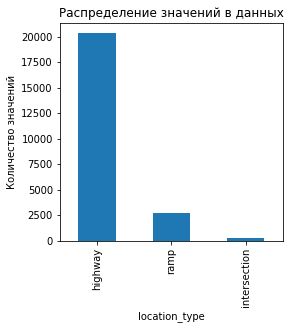

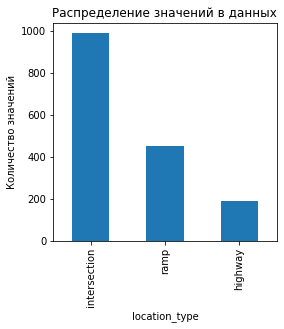

In [43]:
# выбираем диапазон
data_query =  data[data['intersection'] == 0]
data_query_1 =  data[data['intersection'] == 1]
# выбираем колонку
columns_plot = ['location_type']

# строим график
plot_bar(data_query ,(4,4))
plot_bar(data_query_1 ,(4,4))

- Определенно, связь между значениями 'intersection' в разных признаках есть, хотя и не такая безоговорочная. Но если гипотеза не верна, тогда непонятно, как называется место на дороге, где оба признака имеют значение  'intersection'.  

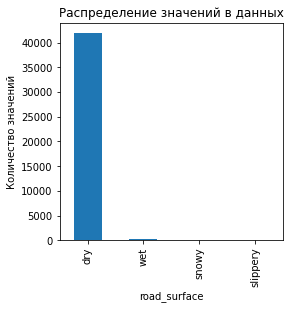

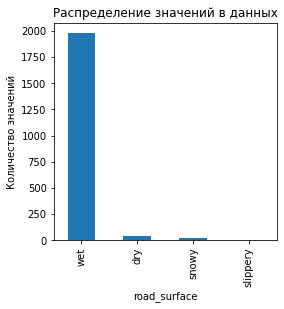

In [44]:
# выбираем диапазон
data_query =  data[data['weather']=='clear']
data_query_1 = data[data['weather']=='raining']

# выбираем колонку
columns_plot = ['road_surface']

# строим график
plot_bar(data_query ,(4,4))
plot_bar(data_query_1 ,(4,4))

- Связь явная и очевидная. 

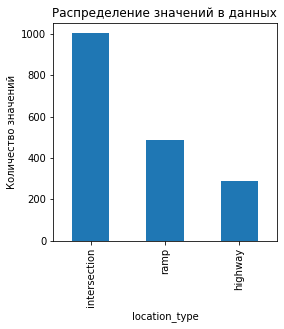

In [45]:
# выбираем диапазон
data_query = data[data['distance'] == 0]

# выбираем колонку
columns_plot = ['location_type']

# строим график
plot_bar(data_query ,(4,4))

- Видимо, существуют другие интерпретации понятия ноль метров до главной дороги, кроме перекрестка. Учтем это в анализе. 

**Проведем предобработку и корректировку признаков.**

In [46]:
# удалим лишние признаки 'road_surface' и 'motor_vehicle_involved_with'
data.drop(['road_surface', 
           'motor_vehicle_involved_with'], axis=1, inplace=True)

In [47]:
# меняем тип данных на int32 и  float32
def change_type(columns, type):
    data[columns
        ] = data[columns].astype(type)
    return data 

data = change_type(data.columns[[1,3,-5,-1]],'int32')
data = change_type(data.columns[[7]],'float32')

In [48]:
# удаляем пробелы в значениях day_of_week
data['day_of_week'] = data['day_of_week'].str.strip()

# проверяем
data['day_of_week'].unique()

array(['sunday', 'wednesday', 'friday', 'monday', 'thursday', 'saturday',
       'tuesday'], dtype=object)

In [49]:
# создаем новый признак: характеристику времени суток
data['times_of_day'] = pd.cut(data['hour'], 4, 
                              labels=['night', 'morning', 'day', 'evening'])

# проверяем
print(data['times_of_day'].value_counts(normalize=True))
data.groupby('hour')['times_of_day'].value_counts()

day        0.432127
morning    0.239147
evening    0.234470
night      0.094256
Name: times_of_day, dtype: float64


hour  times_of_day
0     night            991
1     night           1059
2     night           1112
3     night            668
4     night            474
5     night            653
6     morning         1053
7     morning         2385
8     morning         2388
9     morning         1908
10    morning         2159
11    morning         2684
12    day             3103
13    day             3334
14    day             3845
15    day             4576
16    day             3890
17    day             3978
18    evening         3468
19    evening         2373
20    evening         2023
21    evening         1763
22    evening         1439
23    evening         1265
Name: times_of_day, dtype: int64

In [50]:
# меняем тип данных 'times_of_day': 'category' на 'object'
data['times_of_day'] = data['times_of_day'].astype('object')

In [51]:
# удаляем хвост признака distance

# создаем копию датасета
data_old = data.copy()

# выбираем диапазон до полутора километров
data = data.query('distance <= 15')

# проверяем 
print(data.shape[0]/data_old.shape[0])

# удаляем ненужный объект
del data_old

0.8678100815728927


In [52]:
# заменяем пробелы county_location на символ подчеркивания
data['county_location'] = data['county_location'].replace(' ','_', regex=True)

# проверяем
data['county_location'].unique()

array(['los_angeles', 'sacramento', 'orange', 'shasta', 'riverside',
       'san_diego', 'sonoma', 'contra_costa', 'monterey',
       'san_bernardino', 'solano', 'modoc', 'kern', 'ventura',
       'san_mateo', 'tuolumne', 'butte', 'placer', 'santa_clara',
       'stanislaus', 'inyo', 'humboldt', 'alameda', 'tulare',
       'san_joaquin', 'marin', 'san_luis_obispo', 'fresno',
       'santa_barbara', 'san_francisco', 'san_benito', 'madera',
       'santa_cruz', 'yuba', 'merced', 'napa', 'tehama', 'calaveras',
       'sutter', 'mendocino', 'imperial', 'el_dorado', 'nevada', 'yolo',
       'lake', 'mono', 'glenn', 'kings', 'plumas', 'amador', 'lassen',
       'siskiyou', 'colusa', 'mariposa', 'trinity', 'del_norte', 'sierra',
       'alpine'], dtype=object)

In [53]:
# меняем аномальное значение vehicle_age 161 - 18
data['vehicle_age'].loc[data['vehicle_age']== 161] = 18

# проверяем
data['vehicle_age'].unique()

array([ 2, 10,  9, 11,  1,  7,  8,  3, 13,  5,  6,  4,  0, 12, 14, 16, 15,
       17, 18, 19], dtype=int32)

In [54]:
# удалим лишние значения control_device 
data = data.loc[data['control_device'] != 'obscured']

# объединяем not functioning  и none
data['control_device'].loc[data['control_device']== 'not functioning'] = 'none'

# проверяем
data['control_device'].unique()

array(['functioning', 'none'], dtype=object)

In [55]:
# объединяем Dark-No Street Lights и Dark-Street Lights Not Functioning
data.loc[data['lighting'] == 'dark with street lights not functioning',
         'lighting'] = 'dark with no street lights'

# проверяем
print(data['lighting'].unique())

['daylight' 'dark with street lights' 'dark with no street lights'
 'dusk or dawn']


In [56]:
# удалим лишние значения vehicle_type - "other" 
data = data.loc[data['vehicle_type'] != 'other']

# проверяем
data['vehicle_type'].unique()

array(['sedan', 'coupe'], dtype=object)

In [57]:
# удалим лишние значения weather -  "other" и "wind"
data = data.loc[(data['weather'] != 'other')&(data['weather'] != 'wind')]

# проверяем
data['weather'].unique()

array(['clear', 'cloudy', 'raining', 'snowing', 'fog'], dtype=object)

- Меняем пропущенные значения в столбце location_type на значение 'intersection', если в столбце 'intersection' значение = 0, и на 'highway', если значение в столбце 'intersection' = 1.   

In [58]:
# обрабатываем пропуски
data.loc[(data['location_type'].isna()) & (
    data['intersection'] == 1), 'location_type'] = 'intersection' 
data.loc[(data['location_type'].isna()) & (
    data['intersection'] == 0), 'location_type'] = 'highway' 

# проверяем
print(data['location_type'].unique())
data['location_type'].isna().sum()

['highway' 'ramp' 'intersection']


0

In [59]:
# удалим лишний признак 'intersection'
data.drop('intersection', axis=1, inplace=True)

- Меняем пропуски в столбце 'direction' на значение 'other'.

In [60]:
# обрабатываем пропуски
data['direction'].fillna('other', inplace=True)

# проверяем
print(data['direction'].unique())
data['direction'].isna().sum()

['south' 'east' 'west' 'other' 'north']


0

**Обработаем пропуски в признаках cellphone_in_use (и заменим тип данных).** 


- Проведем небольшое исследование. 

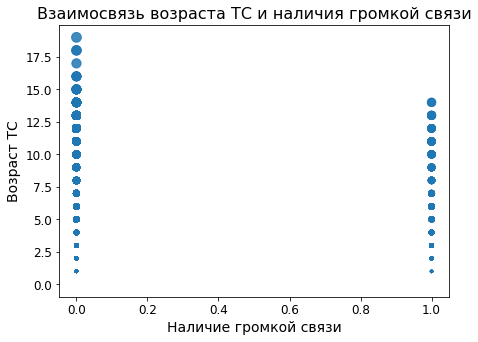

In [61]:
# строим график взаимосвязи возраста ТС и наличия громкой связи
plt.figure(figsize=(7, 5))

plt.scatter(
    data['cellphone_in_use'], 
    data['vehicle_age'],   
    alpha=0.85,
    s=data['vehicle_age']*5
)

plt.title("Взаимосвязь возраста ТС и наличия громкой связи", fontsize=16)
plt.xlabel("Наличие громкой связи", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Возраст ТС", fontsize=14)
plt.yticks(fontsize=12)
plt.show()

- Очевидно, чем старше автомобиль, тем менее вероятно наличие в нем громкой телефонной связи, особенно это заметно после отметки в 15 лет, но в автомобилях моложе 10 лет значения 0/1 распределяются равномерно. Заменим все пропуски на 0. 

In [62]:
# обрабатываем пропуски
data['cellphone_in_use'].fillna(0, inplace=True)

# проверяем
print(data.location_type.unique())
data['cellphone_in_use'].isna().sum()

['highway' 'ramp' 'intersection']


0

In [63]:
# меняем тип данных на int32 
data = change_type(data.columns[[0]],'int32')

- Еще раз проверим датасет на наличие полных дубликатов.

In [64]:
# проверяем дубликаты
data.duplicated().sum()

41

In [65]:
# удаляем явные дубликаты
data.drop_duplicates(inplace=True)

# сбрасываем индексы
data.reset_index(drop= True, inplace= True)

# проверяем результаты преобразований
print(data.duplicated().sum())
data.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45544 entries, 0 to 45543
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cellphone_in_use      45544 non-null  int32  
 1   month                 45544 non-null  int32  
 2   day_of_week           45544 non-null  object 
 3   hour                  45544 non-null  int32  
 4   control_device        45544 non-null  object 
 5   county_location       45544 non-null  object 
 6   direction             45544 non-null  object 
 7   distance              45544 non-null  float32
 8   lighting              45544 non-null  object 
 9   location_type         45544 non-null  object 
 10  road_condition        45544 non-null  object 
 11  vehicle_age           45544 non-null  int32  
 12  vehicle_transmission  45544 non-null  object 
 13  vehicle_type          45544 non-null  object 
 14  weather               45544 non-null  object 
 15  at_fault         

**Вывод** 

- Данные отобраны и очищены, проведем финальное исследование перед построением модели. 

**Дополнительно исследуем очищенные данные.**


- Посмотрим сочетание целевой переменной и признаков.

In [66]:
# создаем функцию построения графиков взаимосвязи целевой переменной и признаков
def plotly_col(data, ylim, xlabel, title): 
    (data.groupby('at_fault')[xlabel]
     .value_counts()
     .unstack(0)
     .apply(lambda x: x/data.shape[0]) # нормализуем данные
     .plot(
        kind='bar',
        xlim=(0,1), 
        ylim=(ylim), 
        grid=True,
        legend=True,
        figsize=(12, 5))
    )
   
    plt.xlabel(xlabel)
    plt.ylabel('at_fault')
    plt.title(title)
    plt.show()    

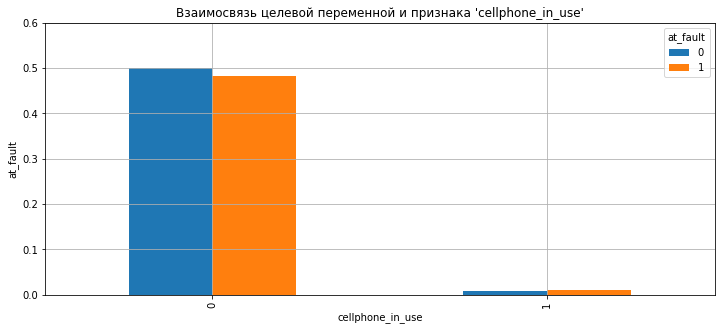

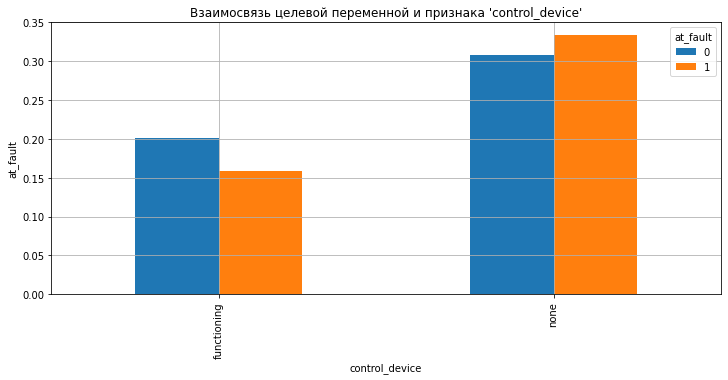

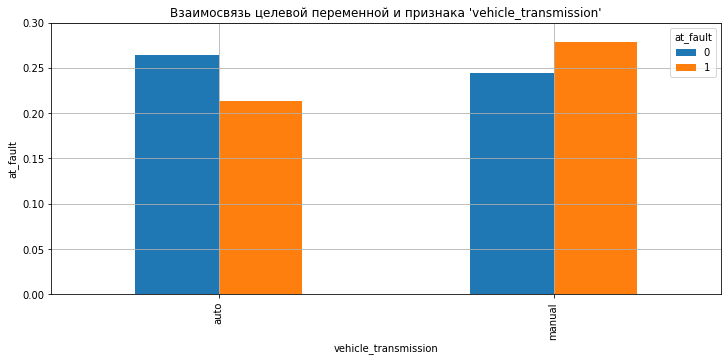

In [67]:
# строим график для 'cellphone_in_use', 'control_device' и 'vehicle_transmission'
plotly_col(data,(0,0.6), 'cellphone_in_use', 
           "Взаимосвязь целевой переменной и признака 'cellphone_in_use'")

plotly_col(data,(0,0.35), 'control_device', 
           "Взаимосвязь целевой переменной и признака 'control_device'")

plotly_col(data,(0,0.3), 'vehicle_transmission', 
           "Взаимосвязь целевой переменной и признака 'vehicle_transmission'")

- У признака 'cellphone_in_use' - слабая дифференциация в зависимости от класса: у разных классов доли виновности и невиновности различаются не очень сильно. Дисбаланс классов внутри признака очень сильный.  Автомобили с ГТС реже становятся виновниками ДТП.  


- У признаков 'control_device' и 'vehicle_transmission' дифференциация (зависимость класса от целевой переменной) выше.  Особенно заметно у признака 'vehicle_transmission'. Также, уровень виновности/невиновности у разных классов диаметрально противоположный. У ТС с автоматической коробкой и круиз-контролем риск  стать виновниками ДТП ниже. 

- Данные по месяцам для наглядности разделим на две выборки.

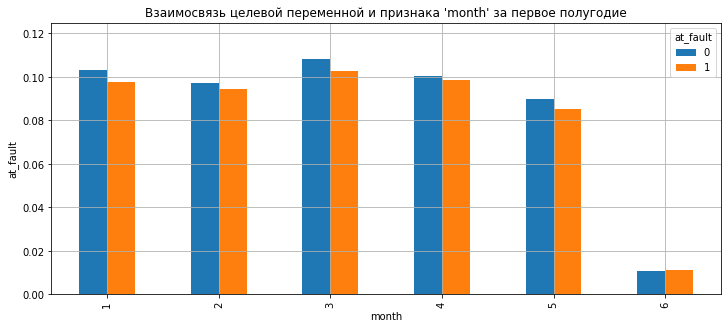

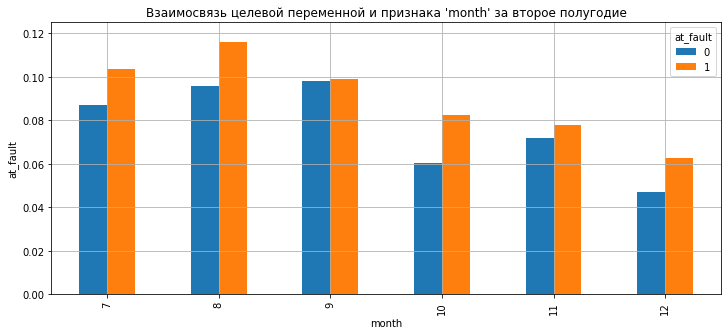

In [68]:
# строим график для 'month' январь-июнь
df_month_1 = data.query('1 <= month <= 6')
df_month_2 = data.query('7 <= month <= 12')

plotly_col(df_month_1,(0, 0.125), 'month',
           "Взаимосвязь целевой переменной и признака 'month' за первое полугодие")

plotly_col(df_month_2,(0, 0.125), 'month',
           "Взаимосвязь целевой переменной и признака 'month' за второе полугодие")

- У признаков 'month' наблюдается хорошая дифференциация в зависимости от класса: у разных классов доли виновности и невиновности различаются. 


- Данные по месяцам неполные, но полугодия различаются по степени отношения к виновности: если в первом полугодии невиновность превалирует, то во втором - наоборот. Заменим признак месяца на обобщающий категорийный признак.      

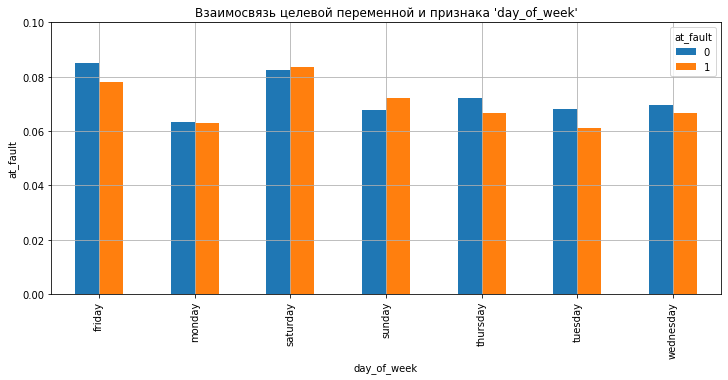

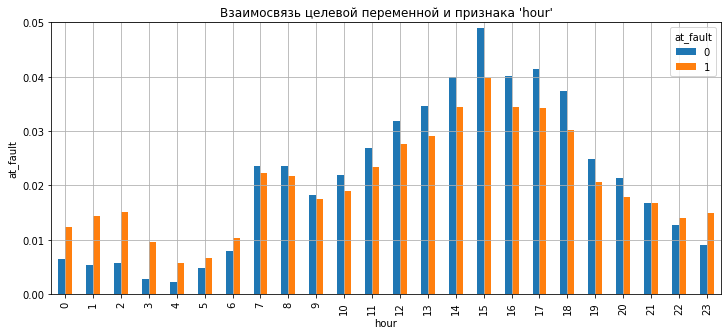

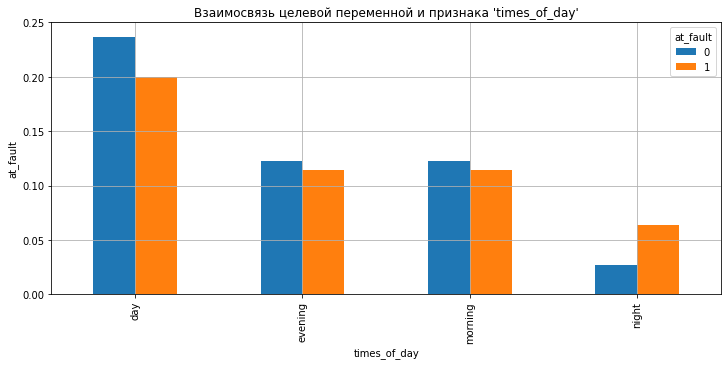

In [69]:
# строим график для 'day_of_week', 'hour' и 'times_of_day

plotly_col(data,(0,0.1), 'day_of_week', 
           "Взаимосвязь целевой переменной и признака 'day_of_week'")

plotly_col(data,(0,0.05), 'hour', 
           "Взаимосвязь целевой переменной и признака 'hour'")

plotly_col(data,(0,0.25), 'times_of_day', 
           "Взаимосвязь целевой переменной и признака 'times_of_day'")

- У признаков 'day_of_week' и 'hour' наблюдается хорошая дифференциация в зависимости от класса: у разных классов доли виновности и невиновности различаются. 


- Чаще виновниками ДТП становятся ночью, в утренние часы и в выходные.


- Значения в новом признаке ('times_of_day') отражают зависимости исходного ('hour').   

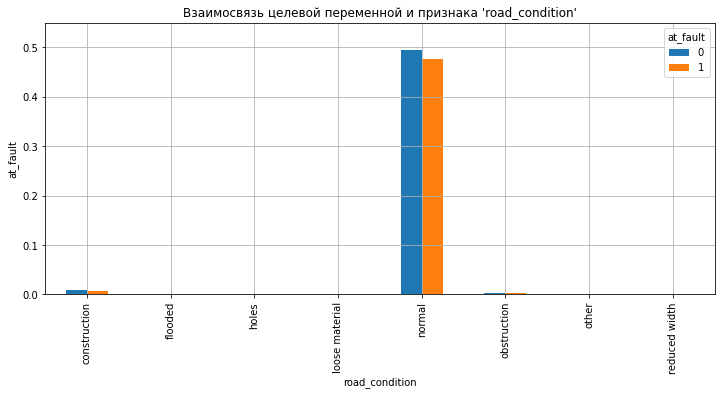

In [70]:
# строим график для 'road_condition'
plotly_col(data,(0,0.55), 'road_condition', 
           "Взаимосвязь целевой переменной и признака 'road_condition'")

- Сложно судить о дифференциации значений признака в зависимости от значения целевой переменной: слишком велик дисбаланс данных - почти все ДТП происходили на нормальной дороге. 


- Выведем график без самой весомой категории.  

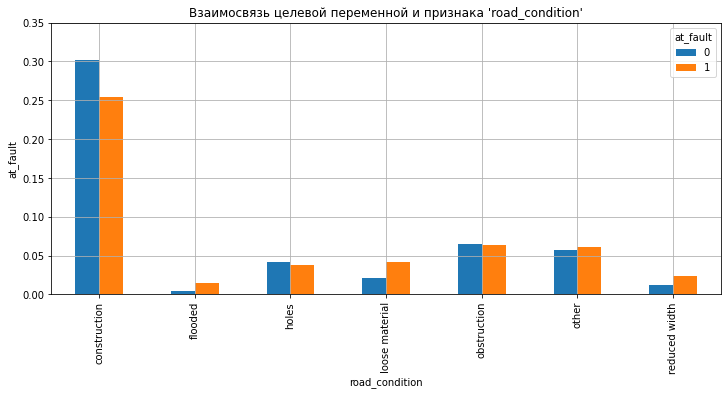

In [71]:
# выбираем диапазон
df=data.loc[data['road_condition'] != 'normal']

# строим график для 'road_condition'
plotly_col(df,(0,0.35), 'road_condition', 
           "Взаимосвязь целевой переменной и признака 'road_condition'")

- Значения имеют выраженную дифференциацию в зависимости от целевой переменной. Судя по графику, ямы на дороге (holes) не сильно влияют на аварийность и виновность, в отличие от ширины проезжей части (reduced Roadway Width) и сыпучего материала на ней (loose Material). 

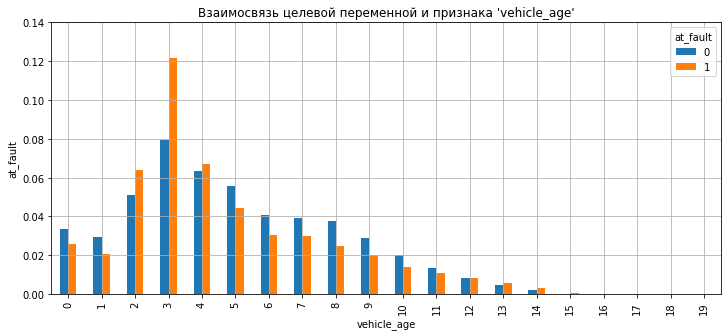

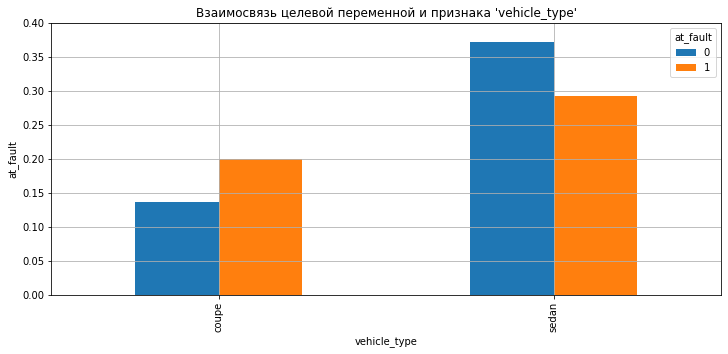

In [72]:
# строим график для 'vehicle_age' и 'vehicle_type'
plotly_col(data,(0,0.14), 'vehicle_age', 
           "Взаимосвязь целевой переменной и признака 'vehicle_age'")

plotly_col(data,(0,0.4), 'vehicle_type', 
           "Взаимосвязь целевой переменной и признака 'vehicle_type'")

-  Признаки хорошо дифференцируются с целевой переменной. Возраст автомобиля сильно влияет на аварийность и виновность. Лидеры по аварийности - ТС до пяти лет. Среди них трехлетние автомобили занимают первое место по аварийности.    


- Баланс виновности и невиновности у седанов и купе диаметрально различаются. Наблюдается хорошая дифференциация в зависимости от класса. Седаны реже становятся виновниками ДТП, купе - наоборот.

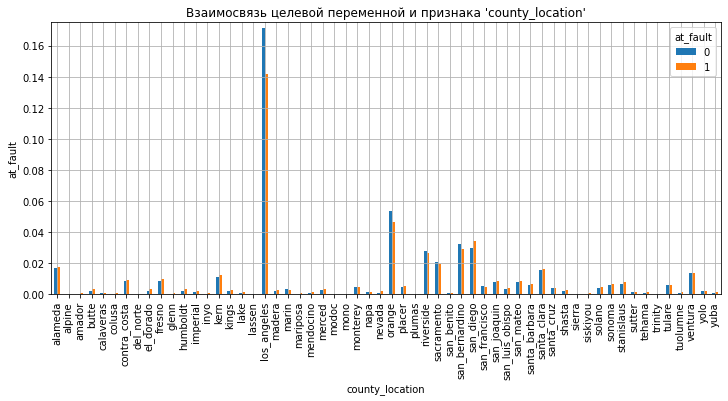

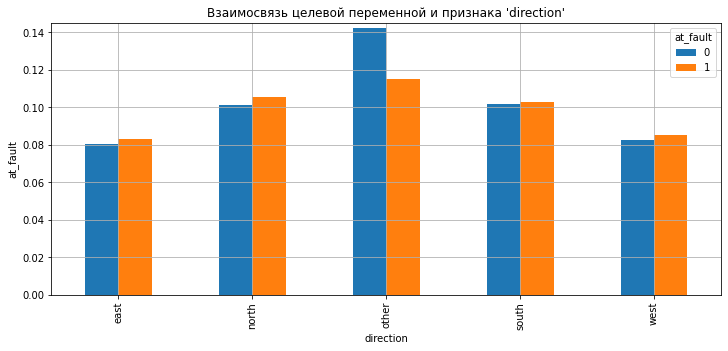

In [73]:
# строим график для  'county_location' и 'direction'
plotly_col(data,(0,0.175), 'county_location',
           "Взаимосвязь целевой переменной и признака 'county_location'")

plotly_col(data,(0,0.145), 'direction', 
           "Взаимосвязь целевой переменной и признака 'direction'")

- Выведем график по регионам без самой весомой категории - Лос-Анджелеса.

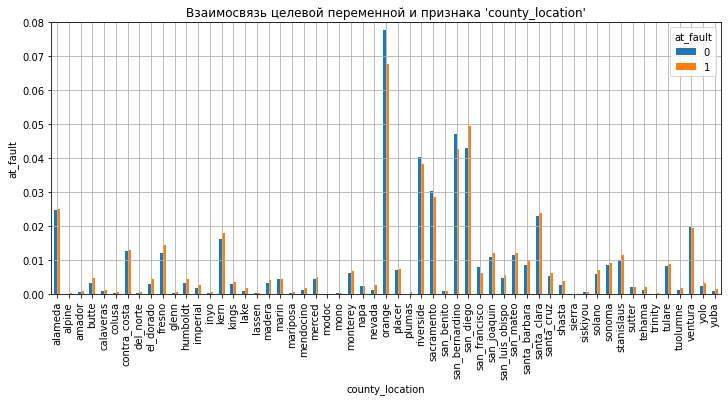

In [74]:
# выбираем диапазон
df=data.loc[data['county_location'] != 'los_angeles']

# строим график для 'county_location'
plotly_col(df,(0,0.08), 'county_location', 
           "Взаимосвязь целевой переменной и признака 'county_location'")

- У признака 'county_location' значения хорошо дифференцируется с целевой переменной: у разных классов доли виновности и невиновности хорошо различаются.


- У признака направления - 'direction' дифференциация почти не наблюдается. Из общей тенденции выбивается только одно значение - 'other'.

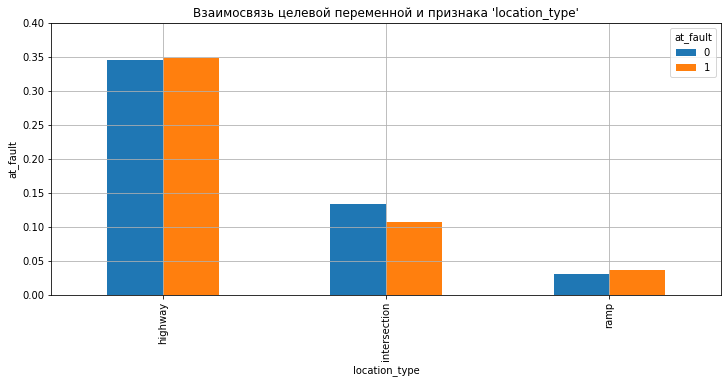

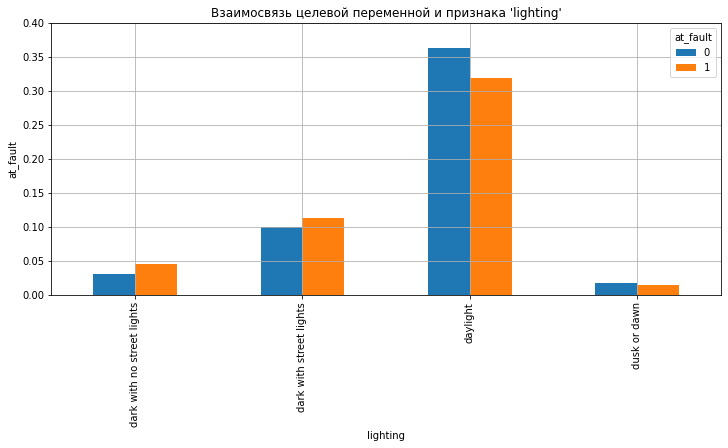

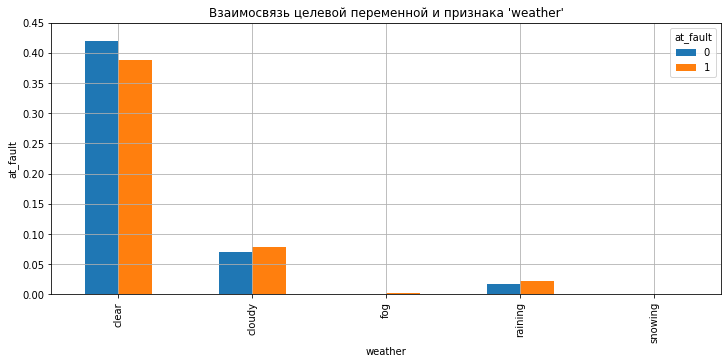

In [75]:
# строим график для  'location_type', 'lighting' и 'weather'
plotly_col(data,(0,0.4), 'location_type',
           "Взаимосвязь целевой переменной и признака 'location_type'")

plotly_col(data,(0,0.4), 'lighting', 
           "Взаимосвязь целевой переменной и признака 'lighting'")

plotly_col(data,(0,0.45), 'weather', 
           "Взаимосвязь целевой переменной и признака 'weather'")

- Посмотрим малочисленные значения 'weather' в укрупненном масштабе.

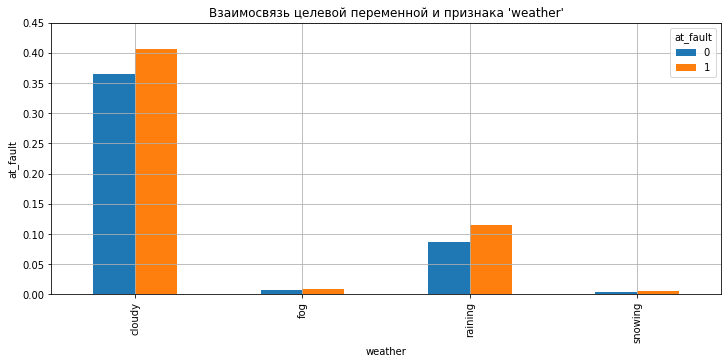

In [76]:
# выбираем диапазон для 'weather'
df=data.loc[data['weather'] != 'clear']

# строим график для 'weather'
plotly_col(df,(0,0.45), 'weather', 
           "Взаимосвязь целевой переменной и признака 'weather'")

- У признака 'location_type' слабая дифференциация признаков от целевой переменной. На перекрестках уровень аварийности ниже, а баланс целевой переменной - 50/50 - в пользу невиновности.


- У 'lighting' уровень виновности ниже в светлое время. Признак хорошо дифференцируется с целевой переменной.  


- У признака погоды ('weather') - наблюдается дифференциация в зависимости от класса: у разных классов доли виновности и невиновности различаются. Доля невиновности выше в ясную погоду, доля виновности - в облачную и дождливую.   

- **Создадим новый признак: полугодие.**

In [77]:
# создаем новый признак: делим 'month' на 2 части
data['half_year'] = pd.cut(data['month'], 2, 
                              labels=[1, 2])

# проверяем
print(data['half_year'].value_counts(normalize=True))
data.groupby('month')['half_year'].value_counts()

1    0.970885
2    0.029115
Name: half_year, dtype: float64


month  half_year
1      1            8879
2      1            8473
3      1            9338
4      1            8796
5      1            7761
6      1             971
7      2             252
8      2             281
9      2             261
10     2             189
11     2             198
12     2             145
Name: half_year, dtype: int64

In [78]:
# меняем тип данных 'half_year' на 'int32'
data['half_year'] = data['half_year'].astype('int32')

- Расставим столбцы по порядку.

In [79]:
name_order = ['cellphone_in_use', 'month', 'day_of_week', 'half_year', 'hour', 'control_device',
       'county_location', 'direction', 'distance', 'lighting', 'location_type',
       'road_condition', 'times_of_day', 'vehicle_age', 'vehicle_transmission', 'vehicle_type',
       'weather', 'at_fault']

# сортируем столбцы
data = data[name_order]

In [80]:
# проверяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45544 entries, 0 to 45543
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cellphone_in_use      45544 non-null  int32  
 1   month                 45544 non-null  int32  
 2   day_of_week           45544 non-null  object 
 3   half_year             45544 non-null  int32  
 4   hour                  45544 non-null  int32  
 5   control_device        45544 non-null  object 
 6   county_location       45544 non-null  object 
 7   direction             45544 non-null  object 
 8   distance              45544 non-null  float32
 9   lighting              45544 non-null  object 
 10  location_type         45544 non-null  object 
 11  road_condition        45544 non-null  object 
 12  times_of_day          45544 non-null  object 
 13  vehicle_age           45544 non-null  int32  
 14  vehicle_transmission  45544 non-null  object 
 15  vehicle_type       

- **Исследуем корреляцию признаков.**

In [81]:
# выбираем столбцы
columns = data.columns

# выбираем интервал
interval_cols = ['distance',
                 'month',
                 'half_year',
                 'hour',
                 'vehicle_age'
                 ]

# задаем матрицу корреляции
corr_matrix = data[columns].phik_matrix(interval_cols=interval_cols)

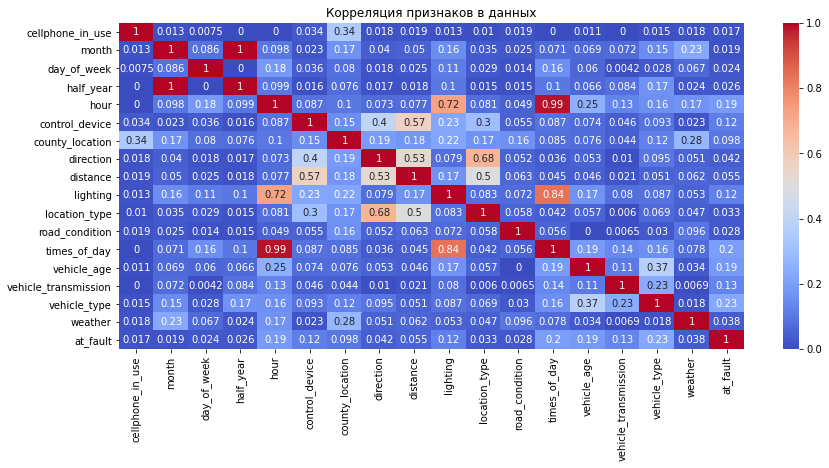

In [82]:
# визуализируем матрицу корреляции через тепловую карту
plt.figure(figsize=(14, 6))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm')
plt.title('Корреляция признаков в данных')
plt.show() 

**Вывод:**

- Изучили взаимосвязь признаков с целевой переменной и взаимную корреляцию признаков и корреляцию признаков с целевой переменной. 


- Создали новый признак на основе признака 'month'.


- У признаков выявлена разная степень дифференциации значений со значениями целевой переменной. 


- Наблюдается сильная взаимная корреляция между типом освещенности ('lighting') и часом ('hour'). Учитывая, что мы создали новую категорию на основе признака 'hour', удалим ненужный признак. 


- Также, заметна приличная взаимная корреляция между направлением ('direction'), типом локации ('location_type') и расстоянием до главной дороги ('distance'). 


- У целевой переменной ('at_fault') наибольшая взаимная корреляция наблюдается с типом кузова 'vehicle_type'.  


- У признаков 'cellphone_in_use' и 'month' самая низкая корреляция с целевой переменной из всех. Вновь созданный признак half_year имеет лучшую корреляцию с таргетом. Учитывая, что основная доля машин не оборудована устройством ГС, а признак месяца мы заменили, удалим признаки 'cellphone_in_use' и 'month' из датасета. 

### Подготовка признаков для обучения 

**План подготовки признаков:**

- Удалим признаки 'cellphone_in_use', 'hour' и 'month'.
  

- Разделим датасет на обучающую и тестовую выборки.


- Проведем масштабирование количественного признака и кодирование категориальных. 

In [83]:
# удаляем лишние признаки
data.drop(['cellphone_in_use',
           'hour',
           'month'
         ], axis=1, inplace=True)

In [84]:
# проверяем дубликаты
data.duplicated().sum()

1424

In [85]:
# удаляем явные дубликаты
data.drop_duplicates(inplace=True)

# сбрасываем индексы
data.reset_index(drop= True, inplace= True)

# проверяем результаты преобразований
print(data.duplicated().sum())
data.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44120 entries, 0 to 44119
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   day_of_week           44120 non-null  object 
 1   half_year             44120 non-null  int32  
 2   control_device        44120 non-null  object 
 3   county_location       44120 non-null  object 
 4   direction             44120 non-null  object 
 5   distance              44120 non-null  float32
 6   lighting              44120 non-null  object 
 7   location_type         44120 non-null  object 
 8   road_condition        44120 non-null  object 
 9   times_of_day          44120 non-null  object 
 10  vehicle_age           44120 non-null  int32  
 11  vehicle_transmission  44120 non-null  object 
 12  vehicle_type          44120 non-null  object 
 13  weather               44120 non-null  object 
 14  at_fault              44120 non-null  int32  
dtypes: float32(1), in

**Сформируем выборки для обучения.**

In [86]:
# формируем выборки: обучающую(75%) тестовую(25%)
features_train, features_test, target_train, target_test = train_test_split(
    data.drop(columns=['at_fault']),
    data.at_fault,
    test_size=0.25,
    random_state=RAND_ST)

# проверяем
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(33090, 14)
(33090,)
(11030, 14)
(11030,)


- Закодируем категориальные признаки разными методами: для Линейной модели и Нейросети - методом OHE, а для Бустинга и Случайного леса - методом OE.

In [87]:
# задаем категориальные признаки для кодировки
ohe_features = features_train.columns[~features_train.columns.isin(['distance'])]

# задаем численные признаки для масштабирования
scaler_features = ['distance']

# задаем переменные отдельно для OE
features_train_oe = features_train.copy()
features_test_oe = features_test.copy()

In [88]:
# задаем переменные для OE
features_train_oe = features_train.copy()
features_test_oe = features_test.copy()

In [89]:
# активируем кодировщик категориальных признаков OHE
encoder_ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# обучаем энкодер на заданных категориальных признаках тренировочной выборки
encoder_ohe.fit(features_train[ohe_features])

# кодируем категориальные признаки
features_train[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_train[ohe_features])

# удаляем лишние столбцы 
features_train = features_train.drop(ohe_features, axis=1)

In [90]:
# кодируем категориальные признаки в тестовом наборе, кодировщиком, обученным на тренировочной
features_test[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_test[ohe_features])

# удаляем лишние столбцы 
features_test = features_test.drop(ohe_features, axis=1)

# проверяем размер итоговых выборок
print(features_train.shape) 
print(features_test.shape)

(33090, 110)
(11030, 110)


In [91]:
# активируем кодировщик категориальных признаков OE
encoder_oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# обучаем энкодер на заданных категориальных признаках тренировочной выборки
encoder_oe.fit(features_train_oe[ohe_features])

# кодируем категориальные признаки
features_train_oe[
    encoder_oe.get_feature_names_out()
] = encoder_oe.transform(features_train_oe[ohe_features])

# кодируем категориальные признаки в тестовом наборе, кодировщиком, обученным на тренировочной
features_test_oe[
    encoder_oe.get_feature_names_out()
] = encoder_oe.transform(features_test_oe[ohe_features])

# проверяем
print(features_train_oe.shape) 
print(features_test_oe.shape)

(33090, 14)
(11030, 14)


- Проведем масштабирование количественного признака методом StandartScaler.

In [92]:
# масштабируем численные признаки 
scaler = StandardScaler()
scaler.fit(features_train[scaler_features])
features_train[scaler_features] = scaler.transform(features_train[scaler_features])
features_test[scaler_features] = scaler.transform(features_test[scaler_features])

# проверяем размер итоговых выборок
print(features_train.shape) 
print(features_test.shape)

(33090, 110)
(11030, 110)


In [93]:
# масштабируем численные признаки 
scaler.fit(features_train_oe[scaler_features])
features_train_oe[scaler_features] = scaler.transform(features_train_oe[scaler_features])
features_test_oe[scaler_features] = scaler.transform(features_test_oe[scaler_features])

# проверяем размер итоговых выборок
print(features_train_oe.shape) 
print(features_test_oe.shape)

(33090, 14)
(11030, 14)


### Вывод по четвертому шагу

- Подготовили набор данных на основе предложений заказчика.


- Провели первичный отбор факторов для модели.


- Провели статистическое исследование факторов.


- Исследовали данные.


- Внесли корректировки в отобранные факторы: обработали пропуски, дубликаты и аномалии, удалили ненужные категории, добавили новые, изменили тип данных.


- Сформировали обучающую и тестовой выборки.


- Провели кодирование категориальных и масштабирование количественных признаков.

## Поиск лучшей модели

### Выбор метрики

- **Бизнес-задача формулируется так:** "Оценить риск ДТП по выбранному маршруту движения".


- Стоить заметить, что в базе содержатся данные лишь об участниках ДТП. То есть, для предсказания истинного риска угодить в ДТП, не хватает данных с теми, кто в ДТП не попал. Другими словами, на имеющейся базе мы с уверенностью можем предсказать только вероятность виновности или невиновности участника ДТП.  Тем не менее, так как другой базы и условий заказчик не предоставил, будем строить работу моделей исходя из имеющейся целевой переменной. 


- **Рассмотрим вероятные исходы:**

   1. Модель предсказывает: 1 (виновен). На самом деле: 1 (виновен). Истинно положительный ответ.
      Сервис предлагает более безопасный маршрут, и водитель не становится виновником ДТП. Сервис в прибыли.
   2. Модель предсказывает: 0 (не виновен). На самом деле: 1 (виновен). Ложноотрицательный ответ.
      Сервис не предлагает более безопасный маршрут и водитель становится виновником ДТП. Сервис терпит серьезный репутационный убыток (ТС застраховано, виновник так или иначе восстанавливает авто за свой счет).
   3. Модель предсказывает: 1 (виновен). На самом деле: 0 (не виновен). Ложноположительный ответ.
      Сервис предлагает новый маршрут, водитель не становится  виновником ДТП, но тратит больше времени на поездку. Сервис - в репутационном убытке.
   4. Модель предсказывает: 0 (не виновен). На самом деле: 0 (не виновен). Истинно ложный ответ.
      Сервис не предлагает новый маршрут, водитель не становится виновником ДТП. Сервис в прибыли.
      
 
- Следовательно, **задача для модели ML** звучит так: "Создать модель ML, которая при предсказании минимизирует уровень ложноотрицательных, и одновременно - ложноположительных ответов".       

- Для оценки такой модели, подходит **метрика F1-мера.**

- Также, в качестве общей метрики, оценим долю правильных ответов с помощью **Accuracy**.

### ML - модели 

- **Для работы выберем четыре модели:**

 - LogisticRegression.
 - RandomForestClassifier.
 - CatBoostClassifier.
 - NeuralModelClassifier.
 - NeuralModelClassifier_manual.

In [94]:
# создаем функцию работы моделей
def ML_score(model, features_train, features_test, target):
    
    # обучаем модель
    model.fit(features_train, target_train) 
    
    # получаем предсказание
    predicted_test = model.predict(features_test)
    
    # считаем метрики 
    f1 = round(f1_score(target, predicted_test),3)
    accuracy = round(accuracy_score(target, predicted_test),3)
    
    return f1, accuracy, predicted_test, model

In [95]:
%%time
# подбираем гиперпараметры для Логистической регрессии

# активируем модель
model_LR_HCV = LogisticRegression()

# задаем область поиска гиперпараметров
parametrs =  { 'n_jobs': [1, -1],
               'max_iter': range(100, 2001, 50),
               'C': [0.1, 1, 100]
              }

# активируем поиск и запускаем обучение
HCV_LR = HalvingRandomSearchCV(model_LR_HCV, 
                               parametrs,
                               cv=10,
                               n_jobs=-1, 
                               factor=2,
                               max_resources=160,
                               scoring='f1',
                               random_state=RAND_ST,
                               verbose=1)

HCV_LR.fit(features_train, target_train)

# выводим найденные гиперпараметры
display(HCV_LR.best_params_) 

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 40
max_resources_: 160
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 4
n_resources: 40
Fitting 10 folds for each of 4 candidates, totalling 40 fits
----------
iter: 1
n_candidates: 2
n_resources: 80
Fitting 10 folds for each of 2 candidates, totalling 20 fits
----------
iter: 2
n_candidates: 1
n_resources: 160
Fitting 10 folds for each of 1 candidates, totalling 10 fits


{'n_jobs': 1, 'max_iter': 450, 'C': 100}

CPU times: user 6.72 s, sys: 4.79 s, total: 11.5 s
Wall time: 11.4 s


In [96]:
%%time 
# получаем предсказание Логистической регрессии с подобранными 
# гиперпараметрами на тестовой выборке
f1_LR, accuracy_LR, predicted_test_LR, model_LR = ML_score(HCV_LR.best_estimator_,
                                                     features_train, 
                                                     features_test, 
                                                     target_test)

# выводим итоговые показатели 
print('F1 LogisticRegression:',f1_LR)
print('Accuracy LogisticRegression:', accuracy_LR)

F1 LogisticRegression: 0.585
Accuracy LogisticRegression: 0.601
CPU times: user 4.21 s, sys: 2.56 s, total: 6.77 s
Wall time: 6.8 s


In [97]:
%%time
# подбираем гиперпараметры для RandomForestClassifier

# активируем модель
model_RFC_HCV = RandomForestClassifier(random_state=RAND_ST)

# задаем область поиска гиперпараметров
parametrs = {'n_estimators': range(100, 550, 50), 
             'max_depth': range(1, 12)
            }
# активируем поиск и запускаем обучение
HCV_RFC = HalvingRandomSearchCV(model_RFC_HCV, 
                               parametrs,
                               cv=10,
                               n_jobs=-1, 
                               factor=2,
                               max_resources=160,
                               scoring='f1',
                               random_state = 12345, 
                               error_score="raise",
                               verbose=1)

HCV_RFC.fit(features_train_oe, target_train)

# выводим найденные гиперпараметры
display(HCV_RFC.best_params_)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 40
max_resources_: 160
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 4
n_resources: 40
Fitting 10 folds for each of 4 candidates, totalling 40 fits
----------
iter: 1
n_candidates: 2
n_resources: 80
Fitting 10 folds for each of 2 candidates, totalling 20 fits
----------
iter: 2
n_candidates: 1
n_resources: 160
Fitting 10 folds for each of 1 candidates, totalling 10 fits


{'n_estimators': 300, 'max_depth': 10}

CPU times: user 29.2 s, sys: 275 ms, total: 29.5 s
Wall time: 30.2 s


In [98]:
%%time
# получаем предсказание RandomForestClassifier с выбранными 
# гиперпараметрами  на тестовой выборке
f1_RFС, accuracy_RFC, predicted_test_RFC, model_RFC = ML_score(HCV_RFC.best_estimator_,
                                                    features_train_oe, 
                                                    features_test_oe, 
                                                    target_test)

# выводим итоговые показатели 
print('F1 RandomForestClassifier:',f1_RFС)
print('Accuracy RandomForestClassifier:', accuracy_RFC)

F1 RandomForestClassifier: 0.552
Accuracy RandomForestClassifier: 0.598
CPU times: user 5.34 s, sys: 16.3 ms, total: 5.36 s
Wall time: 5.36 s


In [99]:
%%time
# подбираем гиперпараметры для CatBoostClassifier

# активируем модель
model_CBC_HCV = CatBoostClassifier(random_state=RAND_ST, loss_function='Logloss')

# задаем область поиска гиперпараметров
parametrs = {'iterations': range(100, 600, 50),
             'depth':  range(1,12),
             'learning_rate': [0.001, 0.01, 0.1, 0.3],
             'l2_leaf_reg' : [10, 25, 100]
            }

# активируем поиск и запускаем обучение
HCV_CBC = HalvingRandomSearchCV(model_CBC_HCV, 
                                parametrs,
                                cv=10,
                                n_jobs=-1, 
                                factor=2, 
                                max_resources=160,
                                scoring='f1',
                                random_state=RAND_ST,
                                verbose=1)

HCV_CBC.fit(features_train_oe, target_train, verbose=False)

# выводим найденные гиперпараметры для CatBoostClassifier
best_iterations_СBC = HCV_CBC.best_params_.get('iterations')
best_depth_СBC = HCV_CBC.best_params_.get('depth')
best_learning_rate_СBC = HCV_CBC.best_params_.get('learning_rate')
best_l2_leaf_reg_СBC = HCV_CBC.best_params_.get('l2_leaf_reg')

display(HCV_CBC.best_params_)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 40
max_resources_: 160
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 4
n_resources: 40
Fitting 10 folds for each of 4 candidates, totalling 40 fits
----------
iter: 1
n_candidates: 2
n_resources: 80
Fitting 10 folds for each of 2 candidates, totalling 20 fits
----------
iter: 2
n_candidates: 1
n_resources: 160
Fitting 10 folds for each of 1 candidates, totalling 10 fits


{'learning_rate': 0.1, 'l2_leaf_reg': 10, 'iterations': 100, 'depth': 5}

CPU times: user 7.46 s, sys: 760 ms, total: 8.22 s
Wall time: 44.9 s


In [100]:
%%time
# получаем предсказание CatBoostClassifier с выбранными 
# гиперпараметрами на тестовой выборке  
model_CBC_HCV = CatBoostClassifier(random_state=RAND_ST, 
                                   depth=best_depth_СBC,
                                   learning_rate=best_learning_rate_СBC,
                                   iterations=best_iterations_СBC,
                                   l2_leaf_reg=best_l2_leaf_reg_СBC,
                                   verbose=0)
 
# получаем предсказание CatBoostClassifier на тестовой выборке
f1_CBC, accuracy_CBC, predicted_test_CBC, model_CBC = ML_score(model_CBC_HCV,
                                                       features_train_oe, 
                                                       features_test_oe, 
                                                       target_test)

# выводим итоговые показатели 
print('F1 CatBoostClassifier:',f1_CBC)
print('Accuracy CatBoostClassifier:', accuracy_CBC)

F1 CatBoostClassifier: 0.572
Accuracy CatBoostClassifier: 0.604
CPU times: user 463 ms, sys: 20.3 ms, total: 483 ms
Wall time: 1.08 s


- Проверим в работе Нейросеть из sklearn.

In [101]:
%%time
# подбираем гиперпараметры для NeuralModelClassifier

# активируем модель
model_NMC_HCV = MLPClassifier(solver='adam',
                              learning_rate='adaptive',
                              alpha=1e-5,
                              random_state=RAND_ST)

# задаем область поиска гиперпараметров
parametrs = {'max_iter': range(50, 1000, 5),
             'learning_rate_init': [1e-1, 0.001, 0.01, 0.1],
             'hidden_layer_sizes' : [(5, 2), (10, 5), (60, 40)]
            }

# активируем поиск и запускаем обучение
HCV_NMC = HalvingRandomSearchCV(model_NMC_HCV, 
                                parametrs,
                                cv=10,
                                n_jobs=-1, 
                                factor=2,  
                                max_resources=160,
                                scoring='f1',
                                random_state=RAND_ST,
                                verbose=1,
                                error_score='raise')

HCV_NMC.fit(features_train, target_train)

# выводим найденные гиперпараметры
display(HCV_NMC.best_params_)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 40
max_resources_: 160
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 4
n_resources: 40
Fitting 10 folds for each of 4 candidates, totalling 40 fits
----------
iter: 1
n_candidates: 2
n_resources: 80
Fitting 10 folds for each of 2 candidates, totalling 20 fits
----------
iter: 2
n_candidates: 1
n_resources: 160
Fitting 10 folds for each of 1 candidates, totalling 10 fits


{'max_iter': 60, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (5, 2)}

CPU times: user 16.8 s, sys: 5.31 s, total: 22.2 s
Wall time: 22.2 s


In [102]:
%%time
# получаем предсказание NeuralModelClassifier на тестовой выборке
f1_NMC, accuracy_NMC, predicted_test_NMC, model_NMC = ML_score(HCV_NMC.best_estimator_,
                                                       features_train, 
                                                       features_test, 
                                                       target_test)

# выводим итоговые показатели 
print('F1 NeuralModelClassifier:',f1_NMC)
print('Accuracy NeuralModelClassifier:', accuracy_NMC)

F1 NeuralModelClassifier: 0.557
Accuracy NeuralModelClassifier: 0.596
CPU times: user 7.58 s, sys: 102 ms, total: 7.68 s
Wall time: 7.62 s


- Создадим нейронную сеть вручную, чтобы сравнить ее работу с моделью из sklearn.

In [103]:
# создаем тензоры для обучения нейросети
X_train = torch.FloatTensor(features_train.values)
X_test = torch.FloatTensor(features_test.values)
y_train = torch.FloatTensor(target_train.values)
y_test = torch.FloatTensor(target_test.values)

In [104]:
# задаем количество эпох, нейронов в слоях и долю выключаемых нейронов
num_epochs = 1000
prop_dropout = [0.25, 0.3, 0.5, 0.8]
n_in_neurons = X_train.shape[1]
n_out_neurons = 1 
n_hidden_neurons_1 = 5
n_hidden_neurons_2 = 2

# задаем скорость обучения
learning_rate = 1e-3

#  задаем функцию потерь 
loss = nn.MSELoss()  

- Зададим архитектуру.

In [105]:
# создаем и инициализируем сеть с двумя скрытыми слоями
NNet = nn.Sequential(
    nn.Linear(n_in_neurons, n_hidden_neurons_1),
    nn.ReLU(),
    nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),
    nn.ReLU(),
    nn.Linear(n_hidden_neurons_2, n_out_neurons),
    nn.Sigmoid()
)

# выводим архитектуру
print('Архитектура нейросети:')
print(NNet) 

# проверяем работу
nnet_sq = NNet.forward(X_train) 
print('Среднее значение выхода:', nnet_sq.mean()) 

Архитектура нейросети:
Sequential(
  (0): Linear(in_features=110, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=2, bias=True)
  (3): ReLU()
  (4): Linear(in_features=2, out_features=1, bias=True)
  (5): Sigmoid()
)
Среднее значение выхода: tensor(0.5189, grad_fn=<MeanBackward0>)


- Применим Dropout, чтобы избежать переобучения. Поочередно выключим несколько слоев.

In [106]:
%%time
# создаем список полученной метрики F1 
f1_NNet = np.array([])

# запускаем обучение
for p in prop_dropout:
    NNet = nn.Sequential(
        nn.Linear(n_in_neurons, n_hidden_neurons_1),
        nn.ReLU(),
        nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),
        nn.ReLU(),
        nn.Linear(n_hidden_neurons_2, n_out_neurons),
        nn.Sigmoid()
)    
    
    # создаем Adam оптимизатор     
    optimizer = torch.optim.Adam(NNet.parameters(), lr=learning_rate)  

   
    # обучаем на количестве эпох 1500
    for epoch in range(num_epochs):
        optimizer.zero_grad()
    
        # прямой проход
        preds = NNet.forward(X_train).flatten()     
        loss_value = loss(preds, y_train)
    
        # обратный проход
        loss_value.backward()        
        optimizer.step()
        
        
    # получаем предсказание на тестовой выборке            
    NNet.eval()
    test_preds = NNet.forward(X_test).flatten()
    f1_test = round(f1_score(y_test, test_preds.round().detach().numpy()), 3)
     
    f1_NNet = np.append(f1_NNet, f1_test)  
    
    print(f'Доля dropout: {p}, F1: {round(f1_test,3)}, Количество эпох: {num_epochs}')

best_f1_test =  round(f1_NNet.max(), 3)
best_dropout = prop_dropout[f1_NNet.argmax()]
print()
print('Лучшее значение F1:', best_f1_test, ', Доля dropout:', best_dropout)

Доля dropout: 0.25, F1: 0.493, Количество эпох: 1000
Доля dropout: 0.3, F1: 0.582, Количество эпох: 1000
Доля dropout: 0.5, F1: 0.567, Количество эпох: 1000
Доля dropout: 0.8, F1: 0.66, Количество эпох: 1000

Лучшее значение F1: 0.66 , Доля dropout: 0.8
CPU times: user 1min 32s, sys: 2.49 s, total: 1min 34s
Wall time: 1min 34s


- Модель показывает лучший результат с 80% выключенных нейронов.


- Запустим модель с подобранными параметрами.

In [107]:
%%time
# создаем и инициализируем сеть с заданными гиперпараметрами
NNet = nn.Sequential(
    nn.Linear(n_in_neurons, n_hidden_neurons_1),
    nn.ReLU(),
    nn.Dropout(p=best_dropout),
    nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),
    nn.ReLU(),
    nn.Dropout(p=best_dropout),
    nn.Linear(n_hidden_neurons_2, n_out_neurons),
    nn.Sigmoid()
)

# создаем Adam оптимизатор     
optimizer = torch.optim.Adam(NNet.parameters(), lr=learning_rate)  
    
# создаем список полученных метрик 
accuracy_NNet = np.array([])
precision_NNet = np.array([])
recall_NNet = np.array([])
f1_NNet = np.array([])

# обучаем на количестве эпох 1500
for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    # прямой проход
    preds = NNet.forward(X_train).flatten()     
    loss_value = loss(preds, y_train)
    
    # обратный проход
    loss_value.backward()        
    optimizer.step()
   
    # выводим результат каждую сотую и в последнюю эпохи 
    if epoch % 100 == 0 or epoch == num_epochs - 1:                
        NNet.eval()
        
        test_preds = NNet.forward(X_test).flatten()
       
        accuracy_test = round(accuracy_score(y_test, test_preds.round().detach().numpy()), 3)
        precision_test = round(precision_score(y_test, test_preds.round().detach().numpy()), 3)
        recall_test   = round(recall_score(y_test, test_preds.round().detach().numpy()), 3)
        f1_test  =  round(f1_score(y_test, test_preds.round().detach().numpy()), 3)
        
        accuracy_NNet = np.append(accuracy_NNet, accuracy_test)
        precision_NNet = np.append(precision_NNet, precision_test)
        recall_NNet = np.append(recall_NNet, recall_test)
        f1_NNet =  np.append(f1_NNet, f1_test)
        
        print(f'Эпоха {epoch},\
            F1: {round(f1_test,3)}, Количество эпох: {num_epochs}, Доля dropout: {best_dropout}')
        
best_accuracy_NNet = round(accuracy_NNet.max(), 3)
best_epoch_a = accuracy_NNet.argmax()*100
        
best_precision_NNet = round(precision_NNet.max(), 3)
best_epoch_p = precision_NNet.argmax()*100        

best_recall_NNet = round(recall_NNet.max(), 3)
best_epoch_r = recall_NNet.argmax()*100
        
best_f1_NNet = round(f1_NNet.max(), 3)
best_epoch_f = f1_NNet.argmax()*100

print()
print('Лучшее значение Accuracy:', best_accuracy_NNet, ', Эпоха:', best_epoch_a)
print('Лучшее значение Precision:', best_precision_NNet, ', Эпоха:', best_epoch_p)
print('Лучшее значение Recal:', best_recall_NNet, ', Эпоха:', best_epoch_r)
print('Лучшее значение F1:', best_f1_NNet, ', Эпоха:', best_epoch_f)

Эпоха 0,            F1: 0.66, Количество эпох: 1000, Доля dropout: 0.8
Эпоха 100,            F1: 0.66, Количество эпох: 1000, Доля dropout: 0.8
Эпоха 200,            F1: 0.612, Количество эпох: 1000, Доля dropout: 0.8
Эпоха 300,            F1: 0.58, Количество эпох: 1000, Доля dropout: 0.8
Эпоха 400,            F1: 0.571, Количество эпох: 1000, Доля dropout: 0.8
Эпоха 500,            F1: 0.565, Количество эпох: 1000, Доля dropout: 0.8
Эпоха 600,            F1: 0.569, Количество эпох: 1000, Доля dropout: 0.8
Эпоха 700,            F1: 0.572, Количество эпох: 1000, Доля dropout: 0.8
Эпоха 800,            F1: 0.573, Количество эпох: 1000, Доля dropout: 0.8
Эпоха 900,            F1: 0.57, Количество эпох: 1000, Доля dropout: 0.8
Эпоха 999,            F1: 0.57, Количество эпох: 1000, Доля dropout: 0.8

Лучшее значение Accuracy: 0.607 , Эпоха: 600
Лучшее значение Precision: 0.618 , Эпоха: 600
Лучшее значение Recal: 1.0 , Эпоха: 0
Лучшее значение F1: 0.66 , Эпоха: 0
CPU times: user 24 s, sys: 

- Выведем две лучшие эпохи, чтобы зафиксировать предсказания. 

In [108]:
%%time

NNet = nn.Sequential(
    nn.Linear(n_in_neurons, n_hidden_neurons_1),
    nn.ReLU(),
    nn.Dropout(p=best_dropout),
    nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),
    nn.ReLU(),
    nn.Dropout(p=best_dropout),
    nn.Linear(n_hidden_neurons_2, n_out_neurons),
    nn.Sigmoid()
)

# создаем Adam оптимизатор     
optimizer = torch.optim.Adam(NNet.parameters(), lr=learning_rate)  
    
# создаем список полученных метрик 
f1_NNet = np.array([])

# обучаем на количестве эпох 2
for epoch in range(2):
    optimizer.zero_grad()
    
    # прямой проход
    preds = NNet.forward(X_train).flatten()     
    loss_value = loss(preds, y_train)
    
    # обратный проход
    loss_value.backward()        
    optimizer.step()
   
    # выводим результат каждую сотую и в последнюю эпохи 
    if epoch % 100 == 0 or epoch == 2 - 1:                
        NNet.eval()
        
        test_preds = NNet.forward(X_test).flatten()
        f1_test  =  round(f1_score(y_test, test_preds.round().detach().numpy()), 3)
        f1_NNet =  np.append(f1_NNet, f1_test)
        
        print(f'Эпоха {epoch},\
            F1: {round(f1_test,3)}, Количество эпох: {num_epochs}, Доля dropout: {best_dropout}')
        
best_f1_NNet = round(f1_NNet.max(), 3)
best_epoch_f = f1_NNet.argmax()*100
print()
print('Лучшее значение F1:', best_f1_NNet, ', Эпоха:', best_epoch_f)

Эпоха 0,            F1: 0.66, Количество эпох: 1000, Доля dropout: 0.8
Эпоха 1,            F1: 0.66, Количество эпох: 1000, Доля dropout: 0.8

Лучшее значение F1: 0.66 , Эпоха: 0
CPU times: user 76.8 ms, sys: 4.2 ms, total: 81 ms
Wall time: 30.6 ms


In [109]:
# создаем таблицу с результатами работы моделей
df={'model':  ['LogisticRegression',
               'RandomForestClassifier',
               'CatBoostClassifier',
               'NeuralModelClassifier',
               'NeuralModelClassifier_manual'
              ],
    
    'F1':  [f1_LR,
            f1_RFС,
            f1_CBC,
            f1_NMC,
            best_f1_NNet
           ],
    
    'Accuracy': [accuracy_LR, 
                 accuracy_RFC,
                 accuracy_CBC,
                 accuracy_NMC,
                 best_accuracy_NNet
                ]
   }
# выводим результаты
scores_models_hcv = pd.DataFrame(df).sort_values(by='F1', ascending=False)
scores_models_hcv

,model,F1,Accuracy
4,NeuralModelClassifier_manual,0.660,0.607
0,LogisticRegression,0.585,0.601
2,CatBoostClassifier,0.572,0.604
3,NeuralModelClassifier,0.557,0.596
1,RandomForestClassifier,0.552,0.598


### Вывод по пятому шагу



- Активировали несколько моделей (LogisticRegression, RandomForestClassifier, CatBoostClassifier, NeuralModelClassifier и NeuralModelClassifier_manual) и обучили их с автоматическим подбором гиперпараметров.


- Лучший показатель целевой метрики (**F1**) на тестовой выборке (**0.66**) - у модели Нейронной сети (NeuralModelClassifier_manuel), c 80% выключенных нейронов. Модель быстро обучается, а с повышением количества эпох и количества нейронов в скрытых слоях, также быстро переобучается.  

**Гиперпараметры нейросети:** 
  - количество эпох - 0; 
  - скорость обучения -  1e-3; 
  - оптимизатор  - 'adam'; 
  - количество скрытых слоев - 2, размером 5 и 2 нейрона, соответственно; 
  - метод регуляризации - dropout.


- На втором месте оказалась модель Логистической регрессии.

## Проверка лучшей модели в работе

###  Построение матрицы ошибок и вычисление метрик полноты и точности

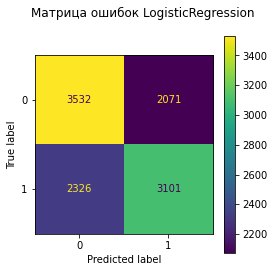

Recall: 0.571
Precision: 0.6


In [110]:
# строим матрицу ошибок для LogisticRegression
disp = ConfusionMatrixDisplay(
    confusion_matrix(target_test, predicted_test_LR),
    display_labels=[0, 1]
)
fig, ax = plt.subplots(figsize=(4, 4))
disp.plot(ax=ax)
fig.suptitle('Матрица ошибок LogisticRegression')

plt.show()

print('Recall:', round(recall_score(target_test, predicted_test_LR),3))
print('Precision:', round(precision_score(target_test, predicted_test_LR),3))

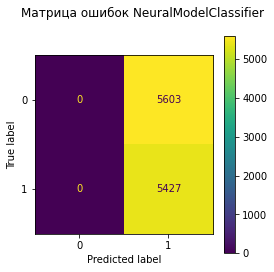

Recall: 1.0
Precision: 0.618


In [111]:
# строим матрицу ошибок для NeuralModelClassifier_manual
# задаем последовательность
preds = test_preds.round().detach().numpy()
real = y_test.round().detach().numpy()

# строим график 
disp = ConfusionMatrixDisplay(
    confusion_matrix(real, preds),
    display_labels=[0, 1]
)
fig, ax = plt.subplots(figsize=(4, 4))
disp.plot(ax=ax)
fig.suptitle('Матрица ошибок NeuralModelClassifier')

plt.show()

print('Recall:', best_recall_NNet)
print('Precision:', best_precision_NNet)

**Вывод:**

- В отличие от Логистической регрессии, у которой довольно высокий показатель recall, модель Нейронной сети (NeuralModelClassifier_manual) идеально предсказывает положительные классы и хорошо - отрицательные. Чаще дает ложноположительные ответы и почти никогда - ложноотрицательные. Если учесть, что снижение риска попадания в ДТП (стать виновником ДТП) является более важным - с этим Нейронная сеть справляется лучше.

In [112]:
# создаем таблицу с результатами работы моделей
df={'model':  ['LogisticRegression',
               'RandomForestClassifier',
               'CatBoostClassifier',
               'NeuralModelClassifier',
               'NeuralModelClassifier_manual'
              ],
    
    'F1':  [f1_LR,
            f1_RFС,
            f1_CBC,
            f1_NMC,
            best_f1_NNet
           ],
    
    'Accuracy': [accuracy_LR, 
                 accuracy_RFC,
                 accuracy_CBC,
                 accuracy_NMC,
                 best_accuracy_NNet
                ],
    
    'Precision': [round(precision_score(target_test, predicted_test_LR),3),
                  round(precision_score(target_test, predicted_test_RFC),3),
                  round(precision_score(target_test, predicted_test_CBC),3),       
                  round(precision_score(target_test, predicted_test_NMC),3),
                  best_precision_NNet
                 ],
    
    'Recall': [round(recall_score(target_test, predicted_test_LR),3),
               round(recall_score(target_test, predicted_test_RFC),3),
               round(recall_score(target_test, predicted_test_CBC),3),
               round(recall_score(target_test, predicted_test_NMC),3),
               best_recall_NNet
              ]
    
   }
# выводим результаты
scores_models_hcv = pd.DataFrame(df).sort_values(by='F1', ascending=False)
scores_models_hcv

,model,F1,Accuracy,Precision,Recall
4,NeuralModelClassifier_manual,0.660,0.607,0.618,1.000
0,LogisticRegression,0.585,0.601,0.600,0.571
2,CatBoostClassifier,0.572,0.604,0.611,0.537
3,NeuralModelClassifier,0.557,0.596,0.605,0.517
1,RandomForestClassifier,0.552,0.598,0.612,0.502


**Вывод:**

- Таблица подтверждает сделанные ранее выводы: лучше всех с задачей минимизации ложноотрицательных ответов справляется Нейронная сеть (написанная вручную), хотя, ее работа в данном случае больше похожа на работу константной модели, которая присваивает всем объектам положительный класс. 

### Анализ важности факторов ДТП

- Построим график важности признаков на примере RandomForestClassifier.

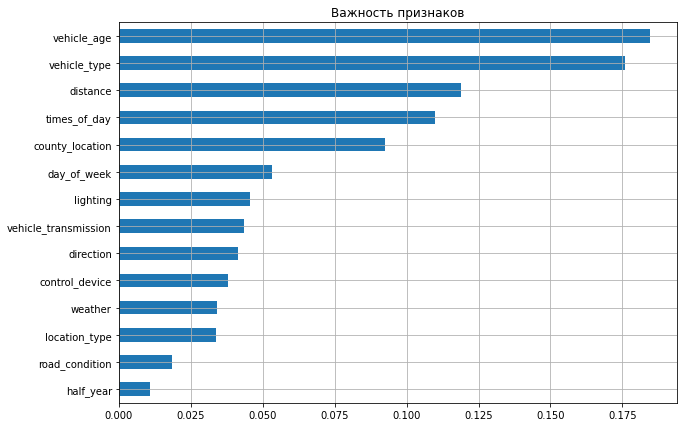

In [113]:
# оцениваем важность признаков
plt.title('Важность признаков')
pd.Series(model_RFC.feature_importances_, index=features_train_oe.columns)\
            .sort_values(ascending=True).plot.barh(figsize=(10,7), grid=True);

**Вывод:**

- Наиболее важными факторами по мнению модели являются: возраст автомобиля ('vehicle_age'), тип кузова ('vehicle_type'), дистанция до главной дороги ('distance'), время суток ('times_of_day')  и регион ('county_location').  Наименее важными признаками для модели оказались: состояние дороги ('road_condition') и добавленный нами признак 'half_year' (полугодие).  

### Дополнительное исследование важных факторов

- Построим график зависимости населенного пункта и целевой переменной. Выберем самое весомое значение.

In [114]:
# создаем датафрейм с предсказаниями и целевыми значениями выбранного признака 
df = {'at_fault_real': target_test,
       'at_fault_predicted': predicted_test_LR,
        'county_location_feautures': features_test_oe['county_location']}
df_product = pd.DataFrame(df, columns = ['at_fault_real', 
                                         'at_fault_predicted', 
                                         'county_location_feautures'])

In [115]:
# выбираем значение признака
df_product_los_ang = df_product.loc[
    df_product['county_location_feautures']== 18] 

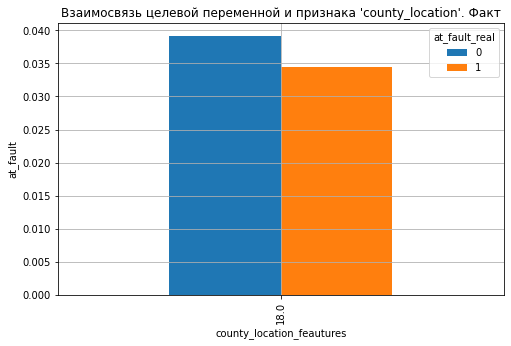

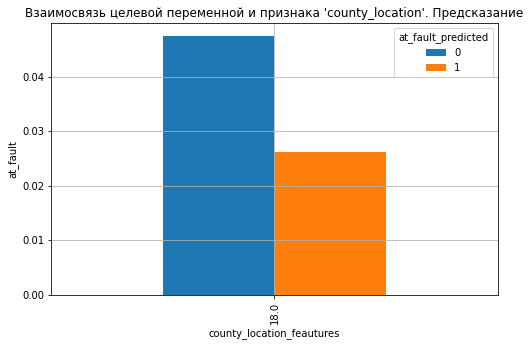

In [116]:
# строим график
(df_product_los_ang.groupby('at_fault_real')['county_location_feautures']
     .value_counts()
     .unstack(0)
     .apply(lambda x: x/data.shape[0]) 
     .plot.bar(
        grid=True,
        legend=True,
        figsize=(8, 5))
)

plt.title("Взаимосвязь целевой переменной и признака 'county_location'. Факт")
plt.ylabel('at_fault')

(df_product_los_ang.groupby('at_fault_predicted')['county_location_feautures']
     .value_counts()
     .unstack(0)
     .apply(lambda x: x/data.shape[0]) 
     .plot.bar( 
        grid=True,
        legend=True,
        figsize=(8, 5))
) 

plt.title("Взаимосвязь целевой переменной и признака 'county_location'. Предсказание")
plt.xlabel('county_location_feautures')
plt.ylabel('at_fault')
plt.show()  

- Баланс целевой переменной по выбранному признаку в реальности выражен слабее, чем предсказывает модель, но тенденция сохраняется. Т.е., отправляясь по маршруту, например, в Лос-Анджелес, вероятность попасть в ДТП меньше, чем избежать аварии (стать или не стать виновником ДТП). Модель немного занижает риск.

- Посмотрим корреляцию признака с целевой переменной. 

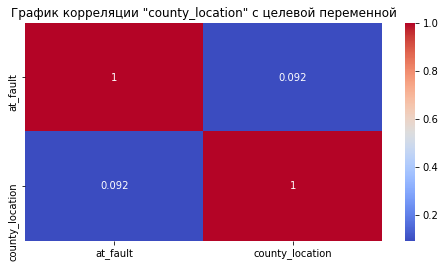

In [117]:
# выбираем столбцы
columns = data.columns

# выбираем интервал
interval_cols = ['at_fault']

# задаем матрицу корреляции
corr_matrix = data[['at_fault', 'county_location']].phik_matrix(interval_cols=interval_cols)

# визуализируем матрицу корреляции через тепловую карту
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm')
plt.title('График корреляции "county_location" с целевой переменной')
plt.show()

- Корреляция признака с целевой переменной и его важность для модели находятся примерно на одном уровне.

**Предложение:**

- Чтобы учесть выбранный фактор во время посадки водителя, можно оборудовать машину GPS-локатором и GPS-навигатором, которые будут отслеживать местоположение автомобиля и маршрут, а также предлагать возможные объездные пути для того, чтобы снизить риск попадания в аварию. Маршрут должен быть отображен заранее, чтобы можно было предложить корректировку маршрута еще до начала движения, а не только во время пути, когда уже возможно повышения риска попадания в ДТП.

### Вывод по шестому шагу 

- Построили матрицы ошибок и проанализировали важность признаков.

- Зафиксировали в таблице значения основных метрик качества работы моделей (в том числе Полноты и Точности).

- Выбрали один из важных для модели факторов и проследили его зависимость от целевой переменной. 

## Общий вывод по модели

**В процессе работы над проектом мы:**

- Подключились к базе и загрузили таблицы sql.

- Провели первичное исследование таблиц.

- Провели статистический анализ факторов ДТП.

- Создали модель для оценки водительского риска.

- Отобрали лучшую модель.

- Проверили лучшую модель в работе.

- Написали промежуточные выводы и общий вывод по модели.


- Лучший показатель целевой метрики (F1) на тестовой выборке (0.66) - показала модель Нейронной сети (NeuralModelClassifier_manual),  c 80% выключенных нейронов. Модель быстро обучается, а с повышением количества эпох и количества нейронов в скрытых слоях, также быстро переобучается.  


**Гиперпараметры нейросети:** 
  - количество эпох - 0; 
  - скорость обучения -  1e-3; 
  - оптимизатор  - 'adam'; 
  - количество скрытых слоев - 2, размером 5 и 2 нейрона, соответственно; 
  - метод регуляризации - dropout.


**Резюме:**   

- Создание адекватной системы оценки риска при выдаче авто возможно, если использовать более полные данные: включить базу не только виновников ДТП, но и водителей, избежавших аварий. Технически, лучше использовать больший объем данных, чтобы модели меньше переобучались, и более сложную архитектуру нейросети. 

 
- Дополнительно можно было бы более четко структурировать данные, убрав оттуда дублирующие категории и значения, и добавить информацию, например, о стаже водителя и его истории аварийности или штрафов. Также, можно расширить данные о перекрестках - добавить информацию о регулируемых и нерегулируемых.   